# Under the hood: ImgLib2

[ImgLib2](http://imagej.net/ImgLib2) is a general-purpose, multidimensional image processing library.  Writing code using ImgLib2 is independent of image dimensionality, data type, and data storage strategy.  It's designed to be reusable, to decouple algorithm development and data management, and to be extensible and adaptable through the addition of new algorithms, pixel types, and storage strategies.

Find javadocs for ImgLib2 [here](http://javadoc.imagej.net/ImgLib2/).

# Quick Start

## Creating and Displaying an Image

The following piece of code creates and displays an 400x320 8-bit gray-level image:

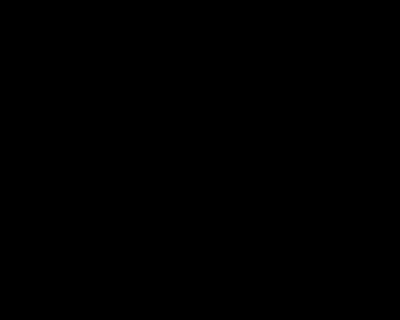

In [1]:
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.type.numeric.integer.UnsignedByteType
 
// will create a window showing a black 400x320 image
long[] dimensions = [400, 320]
final Img< UnsignedByteType > img = new ArrayImgFactory< UnsignedByteType >().create( dimensions,
    new UnsignedByteType() )

Breaking _lines 6-9_ into individual steps...

1. `final ImgFactory< UnsignedByteType > factory = new ArrayImgFactory< UnsignedByteType >();`

2. `final long[] dimensions = new long[] { 400, 320 };`

3. `final UnsignedByteType type = new UnsignedByteType();`

4. `final Img< UnsignedByteType > img = factory.create( dimensions, type );`


_Line 1:_ 
Pixel images in ImgLib2 are created using an [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html). There are different ImgFactories, that create pixel containers with different memory layouts. Here, we create an [ArrayImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImgFactory.html). This factory creates containers that map to a single flat Java array.

The type parameter of the factory that specifies the value type of the image we want to create. We want to create a 8-bit gray-level image, thus we use [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html).

_Line 2:_
Next we create a **`long[]`** array that specifies the image size in every dimension. The length of the array specifies the number of dimensions. Here, we state that we want to create 400x320 2D image.

_Line 3:_
We need to provide a type variable, that is a variable having the type that is to be stored in the image. This must match the generic type parameter of the [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html). Thus we create an [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html).  

_Line 4:_
We create the image, using the factory, dimensions, and type variable.  We store the result of the **`create()`** method in an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) variable. [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) is a convenience interface that gathers properties of pixel image containers such as having a number of dimensions, being able to iterate it's pixels, etc.

## Opening and Displaying Image Files

You can open image files with the [IO](http://javadoc.imagej.net/SCIFIO/io/scif/img/IO.html) utility class of [SCIFIO](https://scif.io/) which calls [Bio-Formats](http://www.openmicroscopy.org/site/support/bio-formats5.1/) as needed. The following opens and displays an image file.

[INFO] Populating metadata
[INFO] Populating metadata


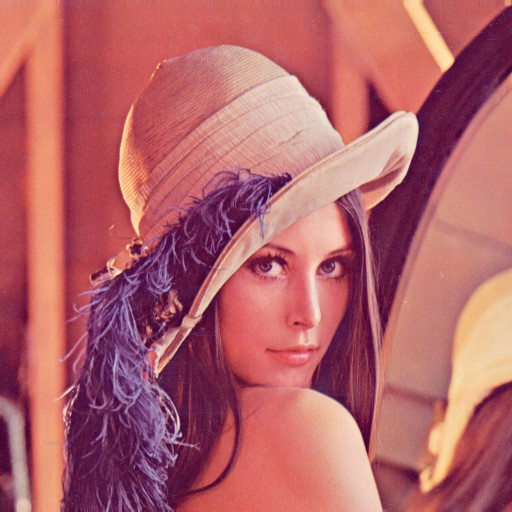

In [6]:
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.type.numeric.integer.UnsignedByteType
import io.scif.img.IO
import net.imagej.ImageJ

// save path for an image of Lena
path = "http://wsr.imagej.net/images/lena.jpg"

// load image
final Img< UnsignedByteType > img = IO.openImg( path,
    new ArrayImgFactory< UnsignedByteType >(), new UnsignedByteType() );

Again, breaking _lines 12-13_ into individual steps...

1. `final ImgOpener opener = new ImgOpener();`

2. `final ImgFactory< UnsignedByteType > factory = new ArrayImgFactory< UnsignedByteType >();`

3. `final UnsignedByteType type = new UnsignedByteType();`

4. `final Img< UnsignedByteType > img = opener.openImg( path, factory, type );`


_Line 1-3:_
When opening an image, we can specify which memory layout to use and as which value type we want to load the image. We want to use the [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) layout again, and we want to have [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html) values again. We need an [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html) and an instance of the value type.

_Line 4:_
We can use the **`openImg()`** method, giving a filename, [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html), and type instance.

> _NOTE:_    
> Note that [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) is just convenience interface. When you get more proficient with ImgLib2 you will find yourself using it less and less. You will either be more concrete or more general than that. In the above example, we could be more concrete—the result of the **`ArrayImgFactory< UnsignedByteType >.create()`** is actually an **`ArrayImg< UnsignedByteType, ByteArray >`**. In algorithm implementations, you want to be as generic as possible to not constrain yourself to specific image types. You will specify only the super-interfaces of [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) that you really need. For instance, if you need something which has boundaries and can be iterated you would use [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html).


# Core Concepts

## Accessibles

In ImgLib2, images are represented by [_Accessibles_](http://imagej.net/ImgLib2_-_Accessibles). Image here refers to any (partial) function from coordinates to values.

In the following sections we will see how pixel values can be manipulated using [_Accessors_](http://imagej.net/ImgLib2_-_Accessors). _Accessors_ are obtained from _Accessibles_. 

_Accessibles_ represent the data itself. Pixel images, procedurally generated images, views into images (for instance sub-images), interpolated images, sparse collections of samples, the list of local intensity maxima of an image, list of nearest neighbors, etc., are all examples of _Accessibles_.

## Accessors

In ImgLib2, images are manipulated using [_Accessors_](http://imagej.net/ImgLib2_-_Accessors).  For pixel images, you can think of an accessor as a movable reference to a pixel.  It can be moved around the image, even to a pixel at specific coordinates.  It can be de-referenced to get the pixel value, and it can retrieve the current position.  The accessors provided by ImgLib2 typically implement [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) of  [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html).


>_NOTE:_    
>Both, [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) and [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) implement the [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html) interface which allows to access pixel values. Both implement the [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) interface which allows to retrieve the accessors current >pixel coordinates. Both inherit (through Localizable) the [EuclideanSpace](http://javadoc.imagej.net/ImgLib2/net/imglib2/EuclideanSpace.html) interval which allows to get the number of dimensions of the image.    
>Furthermore, [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html), [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), and [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) have a type paramer **< T >** that refers to the value type of the underlying image.

### RandomAccess

[RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) provides n-dimensional random access through the [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) interface. It can be used to access pixels at arbitrary integer coordinates. 

The following code uses a RandomAccess to draw some white pixels into an image.

>_NOTE:_
> * **`get()`** is defined in the [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html) interface, so you can obtain pixel references from a Cursor in exactly the same way.
> * Often, the **`T`** obtained from **`Sampler < T >.get()`** is a proxy object that is re-used internally. You should assume that moving the accessor invalidates the proxy. If you want to keep a permanent reference to a pixel, use the **`Sampler < T >.copy()`** method. In the above example, this would return a copy of the RandomAccess refering to the same pixel.
> * The [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html), [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html), … interfaces are not restricted to accessors. In fact, many ImgLib2 entities are [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html). For instance, the [Point](http://javadoc.imagej.net/ImgLib2/net/imglib2/Point.html) class implements [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) and [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html), and simply represents a n-dimensional coordinate. In your own code, whenever you have something that can provide coordinates, you should consider implementing [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html).

First, we will create a 400x320 8-bit gray-level image.

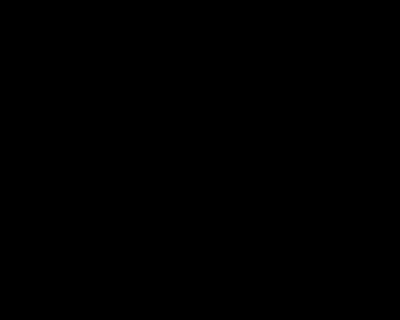

In [1]:
import net.imglib2.img.array.ArrayImgs

long[] dimensions = [400, 320]
img = ArrayImgs.unsignedBytes(dimensions)

>_NOTE:_    
> Up to now we used an **`ArrayImgFactory`** to create a new image. Here we use the utility class **`ArrayImgs`** to create ArrayImgs of different types taking the desired dimensionality as an argument. This provides a more convenient way to create images.

Next, we will create a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) to the image. Img implements the [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html) interface, thus we can use randomAccess() to obtain one. The [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) has the same generic type, [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html), as the image.

In [2]:
r = img.randomAccess()
random = new Random()

java​.util​.Random​@3d133cdb

Using a Groovy style **for** loop, we will set 1000 random pixels to the value of 255 (ie. _white_).  

First, we obtain the _x_, _y_ coordiantes of a random pixel within the image boundaries (_lines 2-3_). 

Then we position the [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) at those coordinates using **setPosition()** from the [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) interface, which takes two parameters, the coordinate and the dimension (_lines 4-5_), so we set the coordinate in dimension 0 to the value _x_, and we set the coordinate in dimension 1 to the value _y_.  

In _line 6_, using **get()**, we retrieve the pixel value at that coordinate; this method retunrs an instance of the pixel value type [UnsignedByteType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/integer/UnsignedByteType.html) that acts as a reference to the pixel.  

Finally, we set the pixel value to 255 (ie. _white_) via this reference (_line 7_).

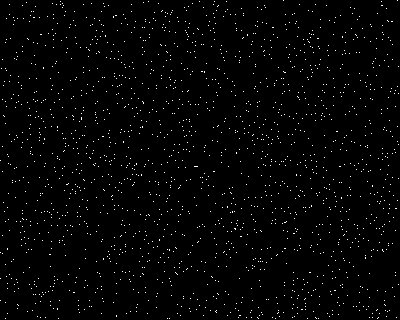

In [4]:
1000.times {
  x = ( int ) ( random.nextFloat() * img.max( 0 ) )
  y = ( int ) ( random.nextFloat() * img.max( 1 ) )
  r.setPosition( x, 0 )
  r.setPosition( y, 1 )
  t = r.get()
  t.set( 255 )
}
img

Before we move on to the "other" accessor, [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html), let's consider a generalization of the previous example. Let's say we like setting random pixels, and because we plan to do this a lot in the future, we extract this functionality into a method.

Easy enough. But what if we want to apply the method to images of another value type, e.g. **`DoubleType`** or **`ARGBType`**? What if we want to apply it to a 3D image? ImgLib2 allows you to write code that handles of this transparently. 

In the following example, we write a function that sets 1000 random pixels to "white" no matter what.

We are going to write a **`draw()`** method that can be applied to many ImgLib2 constructs that are not pixel  [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html)s. For instance there are Views that employ on-the-fly coordinate transforms, sampled and interpolated data, etc.

There is no need to restrict ourselves to [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html).  We need be able to get a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), so we need **`RandomAccessible< T >`**, and to get the number of dimensions and the extent in every dimension,  so we need [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) and therefore use **`RandomAccessibleInterval< T >`**.

However, with great power comes great responsibility… Taking a general [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) means that we no longer can assume that the interval starts at coordinates (0,0,…,0). Thus we need to make a final modification to correctly draw between min and max of the interval.

In [5]:
import java.util.Random
import net.imglib2.*
  
construct01 = new Object() {
  def <T> void draw( final RandomAccessibleInterval< T > img, final T value ) {
    // get the number of dimensions
    final int n = img.numDimensions()
    // Taking a general Interval means that we no longer can assume 
    // that the interval starts at coordinates (0,0,…,0). Thus we need 
    // to make a final modification to correctly draw between min and max of the interval.
    final long[] min = new long[ n ]
    img.min( min )
    final long[] scale = new long[ n ]
    for ( int d = 0; d < n; ++d ) {
      scale[ d ] = img.max( d ) - min[ d ]
    }
    final long[] pos = new long[ n ]

    // create a RandomAccess to the image (now the generic type, T)
    // Img implements the RandomAccessible interface, 
    // thus we can use randomAccess() to obtain one
    final RandomAccess< T > r = img.randomAccess()
    final Random random = new Random()
    for ( int i = 0; i < 1000; ++i ) {
      // loop over all dimensions when setting the position of the RandomAccess
      for ( int d = 0; d < n; ++d ) {
        pos[ d ] = min[ d ] + ( long ) ( random.nextFloat() * scale[ d ] )
      }
      // set the position
      r.setPosition( pos )

      // get() the pixel at that coordinate and 
      // set the pixel value via this reference
      r.get().set( value )
    }
  }  
}

Script5​$1​@6031d6e6

In this example, we use a 3D FloatType image.  We will call the **`draw()`** method and display the resulting image.    

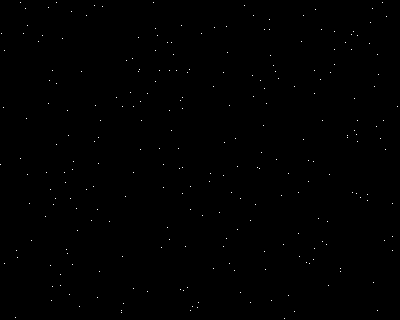

In [6]:
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.img.array.ArrayImgs

long[] dimensions = [400, 320, 5]
img = ArrayImgs.floats(dimensions)
construct01.draw( img, new FloatType(255f)) // call draw() method
img

>_NOTE:_
> * Besides **`setPosition()`** in a single or all dimensions, you can also relatively move a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) in one or all dimensions, or move the [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) pixel-wise in one dimension (Have a look at the [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) API doc!) Which of those is most efficient depends on the situation.
> **`T`** here is a **`setPosition()`** version which takes a [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html). Often a situation occurs where you want to position accessor _a_ to the same location as accessor _b._ In this situation you can avoid localizing _b_ into an array and using that array to set the position of _a._ You can simply **`a.setPosition( b )`** because _b_ is [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html).
> * By _image_, we do not necessarily mean _pixel image._
> * We use the generic parameter **`< T extends Type< T > >`** instead of **`< Type >`** throughout ImgLib2 since that allows us to be more type-safe. Imagine implementing an **`add(a, b)`** method for a certain type: using the simpler generic parameter would not allow us to enforce both parameters to have the same subclass of **`Type`**!
> * We create as many variables as possible outside of the loop (in particular, objects) since creating objects costs a bit of execution time and can easily dominate the performance of the algorithm if one is not careful about it.

### Cursor

[Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) provides iteration through the [Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html) interface. It can be moved forward to visit all pixels of the image once.  The [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) concept is not limited to pixel images. A [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) can be used to iterate every collection of [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) samples.

[Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) provides iteration through the [net.imglib2.Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html) interface. **`Iterator.fwd()`** advances the cursor. **`Iterator.hasNext()`** returns true if the cursor can be advanced further. Initially, a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) points before the first element. You have to call **`fwd()`** once to move to the first element.

> _NOTE:_   
> The ImgLib2 [net.imglib2.Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html) interface is different from Java's [java.util.Iterator](https://docs.oracle.com/javase/8/docs/api/java/util/Iterator.html). However, for convenience, [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) implements [java.util.Iterator](https://docs.oracle.com/javase/8/docs/api/java/util/Iterator.html) as well.

Just like [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) extends [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html), so you can **`get()`** the value of the current pixel (respectively sample). It also implements [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html), so you can query the coordinates of the current sample.

Let's look at an example: 

We load and display an image of diatoms.

[INFO] Populating metadata
[INFO] Populating metadata


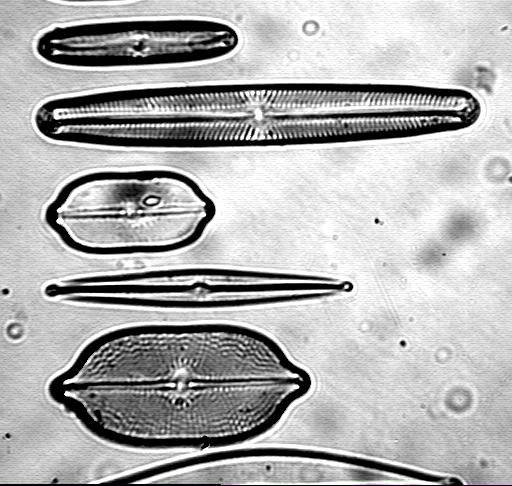

In [9]:
import io.scif.img.IO

// load an image of diatoms
path = "http://wsr.imagej.net/images/Diatoms.jpg"
diatoms = IO.open(path)

Then, we will find the maximum value (the intensity of the brightest pixel) within this image.

In [10]:
import net.imglib2.Cursor
import net.imglib2.img.Img

// we get a Cursor from the image
cursor = diatoms.cursor()
int max = 0

// we iterate over the image 
while ( cursor.hasNext() ) {
  // get the value at the current position
  t = cursor.next()
  // check that if greater than max; if so, set to max
  max = Math.max( t.get(), max )
}
"maximum = " + max

maximum = 255

Let's extend the previous example. Now we are also interested in the coordinates of the maximum. [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) extends the [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) interface which provides methods to get the current location either dimension-by-dimension or all at once.  And let's do this via a generic version; for example, we will not take an **`Img< T >`** as the parameter, because that would be too restrictive.  All we need is something that is iterable. Because we can easily put interval bounds on every iterable set of Localizables, ImgLib2 does not define an Iterable super-interface for IterableInterval. So [IterableInterval< T >](http://jenkins.imagej.net/job/ImgLib-daily/javadoc/index.html?net/imglib2/IterableInterval.html) is the most general we can go here.

So here is our more general method for finding the maximum pixel value in the image:

In [11]:
import net.imglib2.*
 
construct02 = new Object() {
    // IterableInterval<T> is the most general type to use, but must be Comparable
    // the return value of findmax is a Cursor<T>, holds value and coordinates
    public static < T extends Comparable<T>> Cursor< T > findmax( final IterableInterval< T > iterable ) {
        final Cursor< T > cursor = iterable.cursor()
        cursor.fwd()
        Cursor< T > max = cursor.copyCursor()
      while ( cursor.hasNext() ) {
        // to remember the maximum, we simply take a new copy 
        // of the iterating cursor whenever a better max value is found
        if ( cursor.next().compareTo( max.get() ) > 0 ) {
                max = cursor.copyCursor()
        }
      }
        return max
    }
 }

Script11​$1​@755777d5

For finding the maximum, the only restriction we have to put on type T is that it is comparable.

The return value of **`findmax()`** is a **`Cursor<T>`**. Instead of creating a new class that represents a tuple of maximum value and coordinates, we simply return a **`Cursor`** positioned at the maximum.

We will now call this method on the diatoms image, and will use the dimension-by-dimension **`getLongPosition()`** of the [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) interface.

In [14]:
// use findmax and get the maximum value and coordinates from the resulting Cursor,
// using the dimension-by-dimension getLongPosition() of the Localizable interface
max = construct02.findmax( diatoms )
"max = " + max.get().get() + " found at (" + max.getLongPosition( 0 ) + ", " + max.getLongPosition( 1 ) + ")"

max = 255 found at (50, 0)

> _NOTE:_
> * The iteration order is subject to implementation, specialized for each memory layout to minimize access time. For example, an [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) has a different iteration order from a [CellImg](http://javadoc.scijava.org/ImgLib2/net/imglib2/img/cell/CellImg.html). This is nicely illustrated in [ImgLib2 Example 2b - Duplicating an Img using a different ImgFactory](http://imagej.net/ImgLib2_Examples#Example_2b_-_Duplicating_an_Img_using_a_different_ImgFactory).
> * Typically, there are two variants of [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) available. One that calculates its location per each iteration and one that calculates it only per localization request. The former is more efficient when localization occurs frequently, the latter otherwise. In the maximum-finding example, we use the latter because localization is only required once after the maximum has been found. The former one could be obtained using **`localizingCursor()`** instead of **`cursor()`** (see [IterableInterval](http://javadoc.scijava.org/ImgLib2/net/imglib2/IterableInterval.html) API doc)
> * **`copyCursor()`** is a work-around to circumvent a javac bug with covariant return type overriding. In the future (with JDK7) every [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html) can be copied using **`copy()`** instead of having specialised **`copyCursor()`**, **`copyRandomAccess()`**, … methods.

ImgLib2 is not restricted to rasterized images and integer coordinates. It also supports continuous images and real-valued coordinates. Examples where this is appropriate are

* an interpolated image, where an interpolated value can be obtained at any real coordinate. Note that this is a bounded, but continuous image. Thus it is not iterable.
* a procedurally generated image, where a value can be computed at any real coordinate (continuous, unbounded, non-iterable).
* collections of samples taken at arbitrary real coordinates (discrete, bounded, iterable).

Real equivalents of the [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html) and [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) interfaces have been added by which real-valued coordinates can be accessed, [RealPositionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealPositionable.html) and [RealLocalizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealLocalizable.html), respectively.   [RealPositionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealPositionable.html) extends [Positionable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Positionable.html), because whenever something can be positioned at arbitrary real coordinates, of course it can be positioned to integer coordinates as well.  [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) extends [RealLocalizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealLocalizable.html), as something that is able to provide its integer coordinates is always able to provide them as real coordinates too.

Both, [RealRandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccess.html) and [RealCursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealCursor.html) are [RealLocalizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealLocalizable.html). Note that the inheritance relationship of [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) and [RealLocalizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealLocalizable.html) propagates to the cursors. Every [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) is also a [RealCursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealCursor.html) (because it can provide its current integer coordinates as real coordinates as well). There is no such relationship between [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) and [RealRandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccess.html).

You can read more about this final topic and see example code [here](http://imagej.net/ImgLib2_-_Accessors#Accessors_for_Continuous_Coordinates).

# Example 01: Opening, creating and displaying images

Let's get started with ImgLib2 by opening, creating, and displaying images.  You can see these same tutorials on the ImageJ Wiki [here](http://imagej.net/ImgLib2_Examples).

## Opening an ImgLib2 image

The typical way to open an image in ImgLib2 is to make use of the [SCIFIO](http://scif.io/) importer. Below you see two examples of how to open an image as (_a_) its own type (e.g. **`UnsignedByteType`**) and (_b_) as float (**`FloatType`**). For (_a_) we assume, however, that the file contains some real valued numbers as defined by the interface **`RealType`**. Color images are opened as well and color is represented as its own dimension (like in the ImageJ Hyperstacks).

Important: it does not matter which type of Img you use to hold the data as we will use [Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html)s and [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html)es to access the image content. It might be, however, important if you work on two Img at the same time using [Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html)s, see Example2.

In the following example,  (_a_), we use an [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) to hold the data. This means the data is held in one single java basic type array which results in optimal performance. The absolute size of image is, however, limited to 2^31-1 (~2 billion) pixels. The type of [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) to use is set by passing an **ImgOptions** configuration when calling the **ImgOpener**.

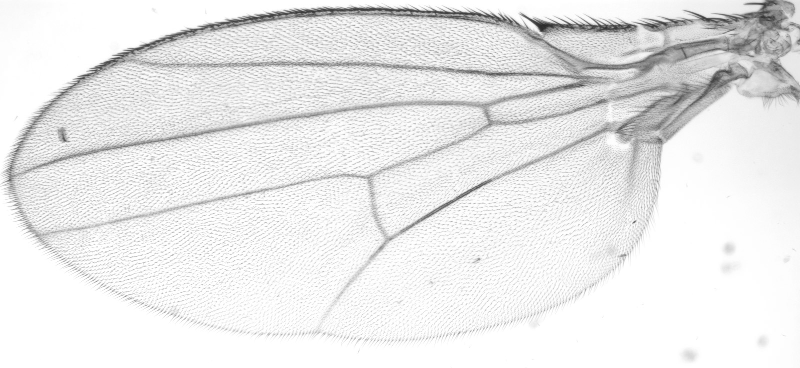

In [1]:
import io.scif.img.ImgOpener

// define the file to open
path = "http://samples.fiji.sc/tutorials/DrosophilaWing.tif"
 
// create the ImgOpener. The type (e.g. ArrayImg, PlanarImg, CellImg) is
// automatically determined. For a small image that fits in memory, this
// should open as an ArrayImg.
imgOpener = new ImgOpener()
 
// open with ImgOpener. 
image = imgOpener.openImgs(path).get(0)

In (_b_) just below, we use a [CellImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/cell/CellImg.html) instead. It partitions the image data into n-dimensional cells each holding only a part of the data. Further, [SCIFIO](http://scif.io/) takes care of caching cells in and out of memory as needed, greatly reducing the memory requirement to work with very large images.

The SCIFIO importer also requires [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html)s that implement [NativeType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/NativeType.html), which means it is able to map the data into a Java basic type array. All available [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html)s until now are implementing [NativeType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/NativeType.html), if you want to work with some self-developed [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) it would be easiest to copy the opened [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) afterwards. Please also note that until now, the only [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) that supports non-native types is the [ListImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/list/ListImg.html) which stores every pixel as an individual object!

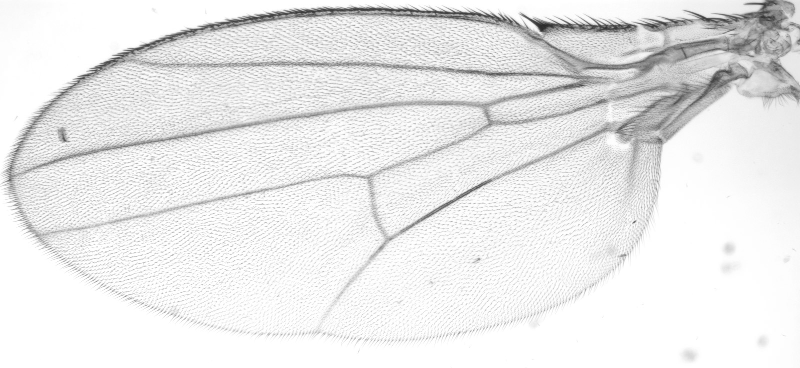

In [3]:
import io.scif.config.SCIFIOConfig
import io.scif.config.SCIFIOConfig.ImgMode

// create the SCIFIOConfig. This gives us configuration control over how
// the ImgOpener will open its datasets.
config = new SCIFIOConfig()
 
// If we know what type of Img we want, we can encourage their use through
// an SCIFIOConfig instance. CellImgs dynamically load image regions and are
// useful when an image won't fit in memory
config.imgOpenerSetImgModes( ImgMode.CELL )
 
// open with ImgOpener as a CellImg
imageCell = imgOpener.openImg( path, config )

## Creating a new ImgLib2 image

Another important way to instantiate a new ImgLib2 [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) is to create a new one from scratch. This requires you to define its [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) as well as the [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html) to use. It does additionally need one instance of the [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) that it is supposed to hold.

In [4]:
import net.imglib2.img.cell.CellImgFactory
import net.imglib2.type.numeric.real.FloatType

// create the ImgFactory based on cells (cellsize = 5x5x5...x5) that will
// instantiate the Img
imgFactory = new CellImgFactory< FloatType >( 5 )
 
// create an 3d-Img with dimensions 20x30x40 (here cellsize is 5x5x5)Ø
long[] dimensions = [20, 30, 40]
img1 = imgFactory.create( dimensions, new FloatType() )

Once you have one instance of an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), it is very easy to create another one using the same [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) and [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html), even if it has a different size. Note that the call [img.firstElement()](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableRealInterval.html#firstElement--) returns the first pixel of any [Iterable](http://javadoc.imagej.net/Java/java/lang/Iterable.html?is-external=true), e.g. an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html).

In [5]:
import net.imglib2.img.Img;
import net.imglib2.img.ImgFactory;

// create another image with the same size
// note that the input provides the size for the new image as it implements
// the Interval interface
img2 = imgFactory.create( img1, img1.firstElement() )

## Displaying images partly using Views

By using the concept of [Views](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) it is possible to display only parts of the image, display a rotated view, and many more cool things. Note that you can also concatenate them. [Views](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) are much more powerful than shown in this example, they will be increasingly used throughout the examples.

A [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html) almost behaves similar to an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), and in fact they share important concepts. Both are [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), and [Views](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) that are not infinite are also an [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) (i.e. those [Views](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) have a defined size) and can therefore be made [Iterable](http://javadoc.imagej.net/Java/java/lang/Iterable.html?is-external=true) (see example 2c). In ImgLib2, all algorithms are implemented for abstract concepts like [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), [Iterable](http://javadoc.imagej.net/Java/java/lang/Iterable.html?is-external=true) or [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html). This enables us, as can be seen below, to display a [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html) the exact same way we would also display an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html).

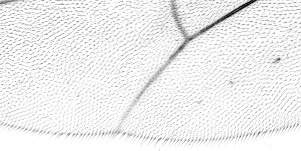

In [6]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.view.Views

// open file as float with ImgOpener
img = new ImgOpener().openImg( "http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType() )
 
// use a View to define an interval (min and max coordinate, inclusive) to display
long[] min = [200, 200]
long[] max = [500, 350]
view = Views.interval( img, min, max)

Now, we will display the partial image at a 90&deg rotation.

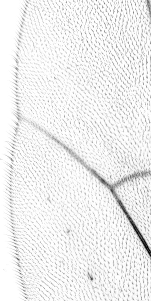

In [7]:
import net.imglib2.view.Views

// display the same area rotated by 90 degrees (x-axis (0) and y-axis (1) switched)
viewRotated = Views.rotate(view, 0, 1) 

# Example 02: How to use Cursor, RandomAccess, and Type

Now that we have a few basics under our belts, let's take a closer look at using [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html), [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), and [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html). You can see these same tutorials on the ImageJ Wiki [here](http://imagej.net/ImgLib2_Examples#Example_2_-_How_to_use_Cursor.2C_RandomAccess_and_Type).

The following examples illustrate how to access pixels using [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) and [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), their basic properties, and how to modify pixel values using [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html).

Accessing pixels using a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) means to iterate all pixels in a way similar to iterating Java collections. However, a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) only ensures to visit each pixel exactly once, the order of iteration is not fixed in order to optimize the speed of iteration. This implies that the order of iteration on two different [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) is not necessarily the same, see the example for "Duplicating an Img using a different ImgFactory". [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s can be created by any object that implements [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html), such as an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html). [Views](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) that are not infinite can be made iterable (see the example for "Generic copying of image data"). Note that in general a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) has significantly higher performance than a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) and should therefore be given preference if possible.

In contrast to iterating image data, a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) can be placed at arbitrary locations. It is possible to set them to a specific n-dimensional coordinate or move them relative to their current position. Note that relative movements are usually more performant. A [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) can be created by any object that implements [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), like an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) or a [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html).

[Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html) is implemented by [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) as well as [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html), which means they are able to report their current location. However, for [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) we differentiate between a **`LocalizingCursor`** and a normal [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html). A **`LocalizingCursor`** updates his position on every move, no matter if it is queried or not whereas a normal [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) computes its location on demand. Using a **`LocalizingCursor`** is more efficient if the location is queried for every pixel, a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) will be faster when localizing only occasionally.

The [Sampler](http://javadoc.imagej.net/ImgLib2/net/imglib2/Sampler.html) interface implemented by [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) and [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) provides access to the [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) instance of the current pixel. Using the [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) instance it is possible to read and write its current value. Depending on the capabilities of the [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) more operations are available, e.g. +, -, *, / if it is a [NumericType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/NumericType.html).

## Duplicating an Img using a generic method

The goal of this example is to make a copy of an existing [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html). For this task it is sufficient to employ [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s. The order of iteration for both [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html)'s will be the same as they are instantiated using the same [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html). It is possible to test if two [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html)s have the same iteration order:

<code>boolean sameIterationOrder = interval1.iterationOrder().equals( interval2.iterationOrder() );</code>

The copy method itself is a generic method, it will work on any kind of [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html). In this particular case it works on a [FloatType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/real/FloatType.html), but would also work on anything else like for example a [ComplexDoubleType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/complex/ComplexDoubleType.html). The declaration of the generic type is done in the method declaration:

<code> public < T extends Type < T > > Img< T > copyImage( ... )</code>

**`< T extends Type< T > >`** basically means that **`T`** can be anything that extends [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html). These can be final implementations such as [FloatType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/real/FloatType.html) or also intermediate interfaces such as [RealType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/RealType.html). This, however, also means that in the method body only operations supported by [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) will be available. Note that the method returns a **`T`**, which also means that it will return an **`Img< FloatType >`** as we provide it with one in the constructor (see the example usage of the **`copyImage(...)`** method below).

In [10]:
import io.scif.img.ImgIOException
import net.imglib2.Cursor
import net.imglib2.img.Img
import net.imglib2.type.Type
 
/**
* Generic, type-agnostic method to create an identical copy of an Img
*
* @param input - the Img to copy
* @return - the copy of the Img
*/
construct03 = new Object() {
  public < T extends Type< T > > Img< T > copyImage( final Img< T > input ) {
    // create a new Image with the same properties
    // note that the input provides the size for the new image as it implements
    // the Interval interface
    output = input.factory().create( input, input.firstElement() )
 
    // create a cursor for both images
    cursorInput = input.cursor()
    cursorOutput = output.cursor()
 
    // iterate over the input
    while ( cursorInput.hasNext())
    {
      // move both cursors forward by one pixel
      cursorInput.fwd()
      cursorOutput.fwd()
 
      // set the value of this pixel of the output image to the same as the input,
      // every Type supports T.set( T type )
      cursorOutput.get().set( cursorInput.get() )
    }
 
    // return the copy
    return output
  }
}

Script1​$1​@27a5cf0f

We will now make a copy of an Image into another one using the generic method above.

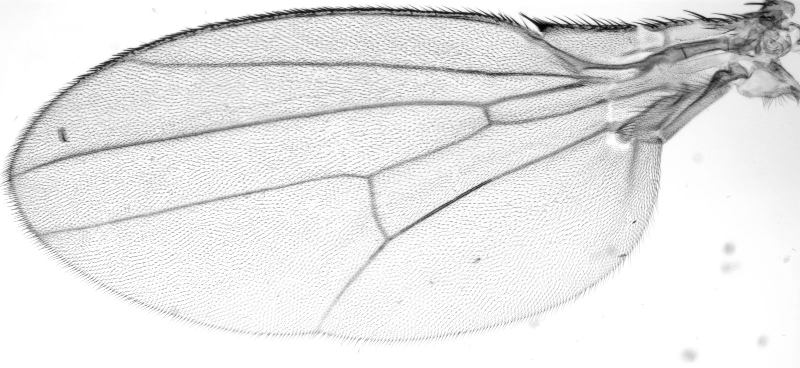

In [11]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType

// open with ImgOpener as a FloatType
img = new ImgOpener().openImg( "http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType() )
 
// copy the image, as it is a generic method it also works with FloatType
duplicate = construct03.copyImage( img )

## Duplicating an Img using a different ImgFactory

<span style="color:red">WARNING: The **copyImageWrong** method in this example makes a mistake on purpose!</span> It intends to show that the iteration order of [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s is important to consider. The goal is to copy the content of an [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) (i.e. an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) that was created using an [ArrayImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImgFactory.html)) into a [CellImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/cell/CellImg.html). Using only [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s for both images will have a wrong result as an [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) and a [CellImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/cell/CellImg.html) have different iteration orders. An [ArrayImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/array/ArrayImg.html) is iterated linearly, while a [CellImg](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/cell/CellImg.html) is iterated cell-by-cell, but linearly within each cell.

In [12]:
import net.imglib2.Cursor
import net.imglib2.img.Img
import net.imglib2.img.ImgFactory
import net.imglib2.type.Type

/**
* WARNING: This method makes a mistake on purpose!
*/
construct04 = new Object() {
  public < T extends Type< T >> Img< T > copyImageWrong( final Img< T > input, final ImgFactory< T > imgFactory ) {
    // create a new Image with the same dimensions but the other imgFactory
    // note that the input provides the size for the new image as it
    // implements the Interval interface
    output = imgFactory.create( input, input.firstElement() )
 
    // create a cursor for both images
    cursorInput = input.cursor()
    cursorOutput = output.cursor()
 
    // iterate over the input cursor
    while ( cursorInput.hasNext())
    {
      // move both forward
      cursorInput.fwd()
      cursorOutput.fwd()
 
      // set the value of this pixel of the output image, every Type supports T.set( T type )
      cursorOutput.get().set( cursorInput.get() )
    }
 
    // return the copy
    return output
    }
}

Script3​$1​@7529af4a

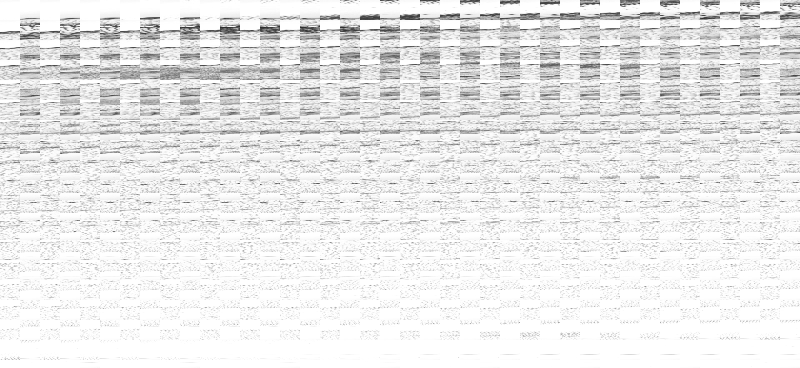

In [13]:
import io.scif.img.ImgOpener
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.img.cell.CellImgFactory
import net.imglib2.type.numeric.real.FloatType

// open with ImgOpener. In addition to using ImgOptions, we can directly
// pass an ImgFactory to the ImgOpener. This bypasses the Img selection
// heuristic and allows custom ImgFactory implementations to be used
img = (Img< FloatType >) new ImgOpener().openImg( "http://samples.fiji.sc/tutorials/DrosophilaWing.tif",
    new ArrayImgFactory< FloatType >() )
 
// copy the image into a CellImg with a cellsize of 20x20
duplicate = construct04.copyImageWrong( img, new CellImgFactory< FloatType >( 20 ) )

<span style="color:red">The correct code for the copy-method (in **copyImageCorrect**) requires the use of a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html).</span> We use a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) to iterate over all pixels of the input and a [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) which we set to the same location as the output. Note that the **setPosition()** call of the [RandomAccess](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccess.html) directly takes the [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) as input, which is possible because [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) implements [Localizable](http://javadoc.imagej.net/ImgLib2/net/imglib2/Localizable.html). Please also note that we use a **LocalizingCursor** instead of a normal [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) because we need the location of the [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) at every pixel.

In [14]:
import net.imglib2.Cursor
import net.imglib2.RandomAccess
import net.imglib2.img.Img
import net.imglib2.img.ImgFactory
import net.imglib2.type.Type

/**
* This method copies the image correctly, using a RandomAccess.
*/
construct05 = new Object() {
  public < T extends Type< T >> Img< T > copyImageCorrect( final Img< T > input, final ImgFactory< T > imgFactory )
  {
    // create a new Image with the same dimensions but the other imgFactory
    // note that the input provides the size for the new image by implementing the Interval interface
    Img< T > output = imgFactory.create( input, input.firstElement() )
 
    // create a cursor that automatically localizes itself on every move
    Cursor< T > cursorInput = input.localizingCursor()
    RandomAccess< T > randomAccess = output.randomAccess()
 
    // iterate over the input cursor
    while ( cursorInput.hasNext())
    {
      // move input cursor forward
      cursorInput.fwd()
 
      // set the output cursor to the position of the input cursor
      randomAccess.setPosition( cursorInput )
 
      // set the value of this pixel of the output image, every Type supports T.set( T type )
      randomAccess.get().set( cursorInput.get() )
    }
    // return the copy
    return output
  }
}

Script10​$1​@56454b34

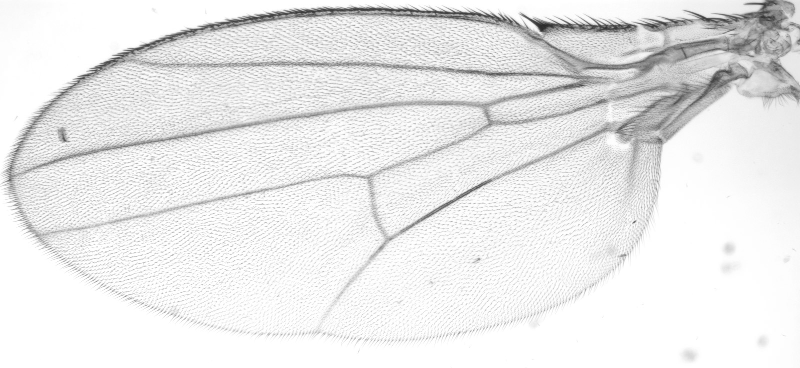

In [15]:
import io.scif.img.ImgOpener
import net.imglib2.img.Img
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.img.cell.CellImgFactory
import net.imglib2.type.numeric.real.FloatType

// open with ImgOpener. In addition to using ImgOptions, we can directly
// pass an ImgFactory to the ImgOpener. This bypasses the Img selection
// heuristic and allows custom ImgFactory implementations to be used
img = (Img< FloatType >) new ImgOpener().openImg( "http://samples.fiji.sc/tutorials/DrosophilaWing.tif",
    new ArrayImgFactory< FloatType >() )
 
// copy the image into a CellImg with a cellsize of 20x20
duplicate = construct05.copyImageCorrect( img, new CellImgFactory< FloatType >( 20 ) )

## Generic copying of image data

In order to write a method that generically copies data requires an implementation for the underlying concepts of [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), [Iterable](http://javadoc.imagej.net/Java/java/lang/Iterable.html?is-external=true) and [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html). In that way, it will run on [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html) and any other class implemented for these interfaces (even if they do not exist yet).

Therefore we design the copy method in a way that the target is an [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html) and the source is [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html). In this way, we simply iterate over the target and copy the corresponding pixels from the source.

As the source only needs to be [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), it can be basically anything that can return a value at a certain location. This can be as simple as an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), but also interpolated sparse data, a function, a ray-tracer, a [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html), ....

As the target needs to be an [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html), it is more confined. This, however does not necessarily mean that it can only be an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) or a [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html) that is not infinite. It simply means it has to be something that is iterable and not infinite, which for example also applies to sparse data (e.g. a list of locations and their values).

In [16]:
import net.imglib2.IterableInterval
import net.imglib2.RandomAccessible
import net.imglib2.type.Type

/**
     * Copy from a source that is just RandomAccessible to an IterableInterval. Latter one defines
     * size and location of the copy operation. It will query the same pixel locations of the
     * IterableInterval in the RandomAccessible. It is up to the developer to ensure that these
     * coordinates match.
     *
     * Note that both, input and output could be Views, Img or anything that implements
     * those interfaces.
     *
     * @param source - a RandomAccess as source that can be infinite
     * @param target - an IterableInterval as target
     */
construct06 = new Object() {
    public < T extends Type< T > > void copy( final RandomAccessible< T > source, final IterableInterval< T >
        target )
    {
        // create a cursor that automatically localizes itself on every move
        targetCursor = target.localizingCursor()
        sourceRandomAccess = source.randomAccess()
 
        // iterate over the input cursor
        while ( targetCursor.hasNext())
        {
            // move input cursor forward
            targetCursor.fwd()
 
            // set the output cursor to the position of the input cursor
            sourceRandomAccess.setPosition( targetCursor )
 
            // set the value of this pixel of the output image, every Type supports T.set( T type )
            targetCursor.get().set( sourceRandomAccess.get() )
        }
    }
}

Script7​$1​@32ade9a

First, we will copy an Image into another with a LocalizingCursor.

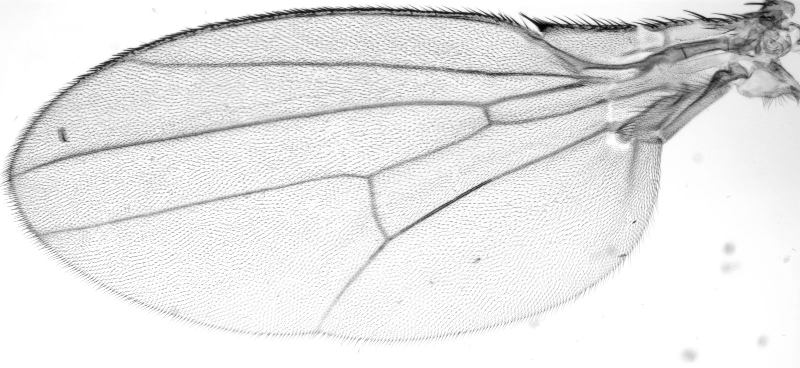

In [17]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
 
// open with ImgOpener as a float
img = new ImgOpener().openImg("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType())
 
// copy & display an image
duplicate = img.factory().create( img, img.firstElement() )
construct06.copy( img, duplicate )
duplicate

Then, we will copy an Image into another with a RandomAccess.

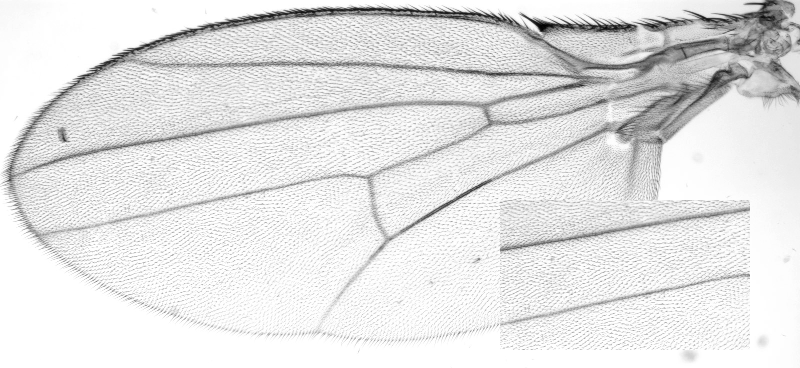

In [18]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.view.Views
 
// open with ImgOpener as a float
img = new ImgOpener().openImg("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType())
 
// use a View to define an interval as source for copying
// Views.offsetInterval() does not only define where it is, but also adds a translation
// so that the minimal coordinate (upper left) of the view maps to (0,0)
long[] offset = [100, 100]
long[] dimension = [250, 150]
viewSource = Views.offsetInterval( img, offset, dimension)
 
// and as target
long[] targetOffset = [500, 200]
long[] targetDimension = [250, 150]
viewTarget = Views.offsetInterval( img, targetOffset, targetDimension)
 
// now we make the target iterable
// (which is possible because it is a RandomAccessibleInterval)
iterableTarget = Views.iterable( viewTarget )
 
// copy it into the original image (overwriting part of img)
construct06.copy( viewSource, iterableTarget )
 
// show the original image
img

# Example 03: Writing generic algorithms

**Imglib2 Examples 01 and 02** tried to introduce important tools you need in order to implement algorithms with ImgLib2. This example will show three generic implementations of algorithms computing the min/max, average, as well as the center of mass.

The core idea is to implement algorithms as generic as possible in order to maximize code-*reusability.* In general, a good way to start is to think: What are the minimal requirements in order to implement algorithm X? This applies to all of the following three concepts:

* **Type**: You should always use the most abstract [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) possible, i.e. the one that just offers enough operations to perform your goal. In this way, the algorithm will be able to run on [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html)s you might not even have thought about when implementing it. A good example is the min&max search in example 3a. Instead of implementing it for [FloatType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/real/FloatType.html) or the more abstract [RealType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/RealType.html), we implement it for the even more abstract [Comparable](https://docs.oracle.com/javase/7/docs/api/java/lang/Comparable.html) & [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html).
* **Image data**: Every algorithm should only demand those interfaces that it requires, not specific implementations of it like [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html). You might require [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html) (infinite), [RandomAccessibleInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessibleInterval.html) (finite), [Iterable](http://javadoc.imagej.net/Java/java/lang/Iterable.html?is-external=true) (values without location), [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html) (values and their location) or their corresponding interfaces for real-valued locations [RealRandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccessible.html), [RealRandomAccessibleRealInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccessibleRealInterval.html) and [IterableRealInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableRealInterval.html). Note that you can concatenate them if you need more than one property.
* **Dimensionality**: Usually there is no reason to restrict an algorithm to a certain dimensionality (like only for two-dimensional images), at least we could not really come up with a convincing example. *If the application or plugin you are developing addresses a certain dimensionality (e.g. stitching of panorama photos) it is understandable that you do not want to implement everything n-dimensionally. But try to implement as many as possible of the smaller algorithm you are using as generic, n-dimensional methods. For example, everything that requires only to **iterate** the data is usually inherently n-dimensional.*

Following those ideas, your newly-implemented algorithm will be applicable to any kind of data and dimensionality it is defined for, not only a very small domain you are currently working with. Also note that quite often this actually makes the implementation simpler.

## Min/Max search

Searching for the minimal and maximal value in a dataset is a very nice example to illustrate generic algorithms. In order to find min/max values, [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html)s only need to be able to compare themselves. Therefore we do not need any numeric values, we only require them to implement the (Java) interface [Comparable](https://docs.oracle.com/javase/7/docs/api/java/lang/Comparable.html). Additionally, no random access to the data is required, we simply need to iterate all pixels, also their location is irrelevant. The image data we need only needs to be [Iterable](http://javadoc.imagej.net/Java/java/lang/Iterable.html?is-external=true).

Below we show **three** small variations of the min/max search. 
* First, in Example 3a, we show the implementation as described above. 
* Second, in Example 3b, we illustrate that this also works on a standard Java ArrayList. 
* Third, in Example 3c, we show how the implementation changes if we do not only want the min/max value, but also their location. This requires to use [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html) instead, as [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) can return their location.

### Example 3a

In [2]:
import net.imglib2.type.Type

construct01 = new Object() {   
  /**
   * Compute the min and max for any {@link Iterable}, like an {@link Img}.
   *
   * The only functionality we need for that is to iterate. Therefore we need no {@link Cursor}
   * that can localize itself, neither do we need a {@link RandomAccess}. So we simply use the
   * most simple interface in the hierarchy.
   *
   * @param input - the input that has to just be {@link Iterable}
   * @param min - the type that will have min
   * @param max - the type that will have max
   */
  public <T extends Comparable< T> & Type<T>> void computeMinMax(Iterable<T> input, T min, T max) {
    // create a cursor for the image (the order does not matter)
    Iterator<T> iterator = input.iterator()
    
    // initialize min and max with the first image value
    T type = iterator.next()
    
    min.set(type)
    max.set(type)
    
    // loop over the rest of the data and determine min and max value
    while (iterator.hasNext()) {
      // we need this type more than once
      type = iterator.next()
      
      if (type.compareTo(min) < 0) {
        min.set( type )
      }
      
      if (type.compareTo(max) > 0) {
        max.set(type)
      }
    }
  }
}

Script2​$1​@4eb32bb3

In [4]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType

/**
 * Perform a generic min & max search
 *
 * @author Stephan Preibisch & Stephan Saalfeld
 *
 */

// open with ImgOpener
img = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)

// create two empty variables
min = img.firstElement().createVariable()
max = img.firstElement().createVariable()

// compute min and max of the Image
construct01.computeMinMax(img, min, max)

["minimum Value (img)": min,
"maximum Value (img)": max]

Key Value minimum Value (img) 42​.0 maximum Value (img) 255​.0

### Example 3b

Note that this example works just the same way if the input is not an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), but for example just a standard Java [ArrayList](https://docs.oracle.com/javase/7/docs/api/java/util/ArrayList.html).

In [5]:
import java.util.ArrayList
import net.imglib2.type.numeric.real.FloatType
 
/**
 * Perform a generic min & max search
 *
 * @author Stephan Preibisch & Stephan Saalfeld
 *
 */

// it will work as well on a normal ArrayList
ArrayList<FloatType> list = new ArrayList<FloatType>()

// put values 0 to 10 into the ArrayList
for (int i = 0; i <= 10; ++i) {
  list.add(new FloatType(i))
}

// create two empty variables
min = new FloatType()
max = new FloatType()
 
// compute min and max of the ArrayList
construct01.computeMinMax(list, min, max)

["minimum Value (arraylist)": min,
"maximum Value (arraylist)": max]

Key Value minimum Value (arraylist) 0​.0 maximum Value (arraylist) 10​.0

### Example 3c

If we want to compute the location of the minimal and maximal pixel value, an [Iterator](http://javadoc.imagej.net/ImgLib2/net/imglib2/Iterator.html) will not be sufficient as we need location information. Instead, the location search will demand an [IterableInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableInterval.html) as input data which can create [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html)s. Apart from that, the algorithm looks quite similar. Note that we do not use a **LocalizingCursor** but only a [Cursor](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html); the location happens only when a new maximal or minimal value has been found while iterating the data.

In [6]:
import net.imglib2.type.Type
import net.imglib2.IterableInterval
import net.imglib2.Point
import net.imglib2.Cursor
 
/**
 * Perform a generic min/max search.
 *
 * @author Stephan Preibisch & Stephan Saalfeld
 *
 */
construct02 = new Object() {
  /**
   * Compute the location of the minimal and maximal intensity for any IterableInterval,
   * like an {@link Img}.
   *
   * The functionality we need is to iterate and retrieve the location. Therefore we need a
   * Cursor that can localize itself.
   * Note that we do not use a LocalizingCursor as localization just happens from time to time.
   *
   * @param input - the input that has to just be {@link IterableInterval}
   * @param minLocation - the location for the minimal value
   * @param maxLocation - the location of the maximal value
   */
  public <T extends Comparable<T> & Type<T>> void computeMinMaxLocation(IterableInterval<T> input, Point
    minLocation, Point maxLocation)
  {
    // create a cursor for the image (the order does not matter)
    final Cursor<T> cursor = input.cursor()
    
    // initialize min and max with the first image value
    T type = cursor.next()
    T min = type.copy()
    T max = type.copy()
    
    // loop over the rest of the data and determine min and max value
    while (cursor.hasNext()) {
      // we need this type more than once
      type = cursor.next()
      
      if (type.compareTo(min) < 0) {
        min.set(type)
        minLocation.setPosition(cursor)
      }
      
      if (type.compareTo(max) > 0) {
        max.set(type)
        maxLocation.setPosition(cursor)
      }
    }
  }
}

Script5​$1​@59650560

In [7]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.Point

// open with ImgOpener
img = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)
 
 // create two location objects
 locationMin = new Point(img.numDimensions())
 locationMax = new Point(img.numDimensions())
 
 // compute location of min and max
 construct02.computeMinMaxLocation(img, locationMin, locationMax)
 
["location of minimum Value (img)": locationMin,
"location of maximum Value (img)": locationMax]

Key Value location of minimum Value (img) (545,25) location of maximum Value (img) (51,0)

## Computing average

In a very similar way, one can compute the average intensity for image data. Note that we restrict the [Type](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) of data to [RealType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/RealType.html). In theory, we could use [NumericType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/NumericType.html) as it offers the possibility to add up values. However, we cannot ensure that [NumericType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/NumericType.html) provided is capable of adding up millions of pixels without overflow. And even if we would ask for a second [NumericType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/NumericType.html) that is capable of adding values up, it might still have numerical instabilities. Note that actually every Java native type has those instabilities. Therefore we use the [RealSum](http://javadoc.imagej.net/ImgLib2/net/imglib2/util/RealSum.html) class that offers correct addition of even very large amounts of pixels. As this implementation is only available for double values, we restrict the method here to [RealType](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/RealType.html).

In [8]:
import net.imglib2.type.numeric.RealType
import net.imglib2.util.RealSum
 
/**
 * Perform a generic computation of average intensity
 *
 * @author Stephan Preibisch & Stephan Saalfeld
 *
 */
construct03 = new Object() {
  /**
   * Compute the average intensity for an {@link Iterable}.
   *
   * @param input - the input data
   * @return - the average as double
   */
  public <T extends RealType<T>> double computeAverage(Iterable<T> input) {
    // Count all values using the RealSum class.
    // It prevents numerical instabilities when adding up millions of pixels
    realSum = new RealSum()
    count = 0
    
    for (T type : input) {
      realSum.add(type.getRealDouble())
      ++count
    }
    
    return realSum.getSum() / count
  }
}

Script7​$1​@13d880a9

In [9]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType

// open with ImgOpener
img = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)
 
// compute average of the image
avg = construct03.computeAverage(img)
"average Value: " + avg

average Value: 233.45769361413045

# Example 04: Specialized iterables

Example 4 will focus on how to work with specialized **iterables**. They are especially useful when performing operations in the local neighborhood of many pixels - like finding local minima/maxima, texture analysis, convolution with non-separable, non-linear filters and many more. One elegant solution is to write a specialized [**Iterable**](https://docs.oracle.com/javase/8/docs/api/java/lang/Iterable.html) that will iterate all pixels in the local neighborhood. We implemented two examples:

* A [**HyperSphere**](http://javadoc.imagej.net/ImgLib2/net/imglib2/algorithm/region/hypersphere/HyperSphere.html) that will iterate an n-dimensional sphere with a given radius at a defined location..
* A [**LocalNeighborhood**](http://javadoc.imagej.net/ImgLib2/net/imglib2/algorithm/neighborhood/Neighborhood.html) that will iterate n-dimensionally all pixels adjacent to a certain location, but skip the central pixel (this corresponds to neighbors in 1d, an 8-neighborhood in 2d, a 26-neighborhood in 3d, and so on ...)

## Example 4a - Drawing a sphere full of spheres

In the first sample we simply draw a sphere full of little spheres. We therefore create a large [**HyperSphere**](http://javadoc.imagej.net/ImgLib2/net/imglib2/algorithm/region/hypersphere/HyperSphere.html) in the center of a [**RandomAccessibleInterval**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessibleInterval.html). Note that the **HyperSphere** only needs a [**RandomAccessible**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), we need the additional [**Interval**](http://javadoc.imagej.net/ImgLib2/net/imglib2/util/Intervals.html) simply to compute the center and the radius of the large sphere. When iterating over all pixels of this large sphere, we create a small [**HyperSphere**](http://javadoc.imagej.net/ImgLib2/net/imglib2/algorithm/region/hypersphere/HyperSphere.html) at every n'th pixel and fill them with a random intensity.

This example illustrates the use of specialized **Iterables**, and emphasizes the fact that they can be stacked on the underlying [**RandomAccessible**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html) using the location of one as the center of a new one. Note that we always create new instances of [**HyperSphere**](http://javadoc.imagej.net/ImgLib2/net/imglib2/algorithm/region/hypersphere/HyperSphere.html) . The code reads very nicely but might not offer the best performance. We therefore added *update* methods to the [**HyperSphere**](http://javadoc.imagej.net/ImgLib2/net/imglib2/algorithm/region/hypersphere/HyperSphere.html)  and its **Cursor** that could be used instead.

Another interesting aspect of this example is the use of the [**ImagePlusImgFactory**](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/imageplus/ImagePlusImgFactory.html), which is the compatibility container for ImageJ. If the required dimensionality and [**Type**](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) is available in ImageJ, it will internally create an ImagePlus and work on it directly. In this case, one can request the ImagePlus and show it directly. It will, however, fail if [**Type**](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html) and dimensionality are not supported by ImageJ and throw a [**ImgLibException**](http://javadoc.imagej.net/ImgLib2/net/imglib2/exception/ImgLibException.html).

In [1]:
import java.util.Random
import net.imglib2.Point
import net.imglib2.RandomAccessibleInterval
import net.imglib2.algorithm.region.hypersphere.HyperSphere
import net.imglib2.algorithm.region.hypersphere.HyperSphereCursor
import net.imglib2.exception.ImgLibException
import net.imglib2.type.numeric.RealType
import net.imglib2.util.Util
 
/**
 * Example 4a - Drawing a sphere full of spheres
 *
 * @author Stephan Preibisch & Stephan Saalfeld
 *
 */
construct01 = new Object() {
  
  /**
    * Draws a sphere that contains lots of small spheres into the center of the
    * interval.
    *
    * @param <T> value type
    * @param randomAccessible - the image data to write to
    * @param minValue - the minimal intensity of one of the small spheres
    * @param maxValue - the maximal intensity of one of the small spheres
   */
  public <T extends RealType<T>> void drawSpheres(final RandomAccessibleInterval<T> randomAccessible, final double
    minValue, final double maxValue)
  {
    // the number of dimensions
    int numDimensions = randomAccessible.numDimensions()
    
    // define the center and radius
    Point center = new Point(randomAccessible.numDimensions())
    int minSize = randomAccessible.dimension(0)
    
    for (int d = 0; d < numDimensions; ++d) {
      int size = randomAccessible.dimension(d)
      int half = size / 2
      center.setPosition(half, d)
      minSize = Math.min(minSize, size)
    }
    
    // define the maximal radius of the small spheres
    final int maxRadius = 5
    
    // compute the radius of the large sphere so that we do not draw
    // outside of the defined interval
    final long radiusLargeSphere = minSize / 2 - maxRadius - 1
    
    // instantiate a random number generator
    final Random rnd = new Random(System.currentTimeMillis())
    
    // define a hypersphere (n-dimensional sphere)
    HyperSphere<T> hyperSphere = new HyperSphere<T>(randomAccessible, center, radiusLargeSphere)
    
    // create a cursor on the hypersphere
    HyperSphereCursor<T> cursor = hyperSphere.cursor()

    while (cursor.hasNext()) {
      cursor.fwd()
      
      // the random radius of the current small hypersphere
      final int radius = rnd.nextInt(maxRadius) + 1
      
      // instantiate a small hypersphere at the location of the current pixel in the large hypersphere
      HyperSphere<T> smallSphere = new HyperSphere<T>(randomAccessible, cursor, radius)
      
      // define the random intensity for this small sphere
      final double randomValue = rnd.nextDouble()
      
      // take only every 4^dimension'th pixel by chance so that it is not too crowded
      if (Math.round(randomValue * 100) % Util.pow(4, numDimensions) == 0) {
        // scale to right range
        randomValue = rnd.nextDouble() * (maxValue - minValue) + minValue
        
        // set the value to all pixels in the small sphere if the intensity is brighter than the existing one
        for (final T value : smallSphere) {
          value.setReal(Math.max(randomValue, value.getRealDouble()))
        }
      }
    }
  }
}

Script1​$1​@47f13ca4

**Note:** The current display method can only display the first frame of multi-framed images, so we only see a "black" image.

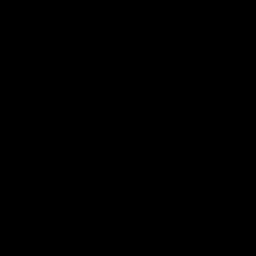

In [2]:
import net.imglib2.type.numeric.integer.UnsignedByteType
import net.imglib2.img.Img
import net.imglib2.img.ImgFactory
import net.imglib2.img.array.ArrayImgFactory

long[] dims = [256, 256, 256]
ImgFactory<UnsignedByteType> imgFactory = new ArrayImgFactory<UnsignedByteType>()
Img<UnsignedByteType> img = imgFactory.create(dims, new UnsignedByteType())

// draw a small sphere for every pixel of a larger sphere
int minv = 0
int maxv = 255
construct01.drawSpheres(img, minv, maxv)

// show the hyperspheres
img

## Example 4b - Finding and displaying local minima

In this example we want to find all local minima in an image and display them as small spheres. To not capture too much of the noise in the image data, we first perform an in-place Gaussian smoothing with a sigma of 1, i.e. the data will be overwritten with the result. A complete documentation of the gauss package for ImgLib2 can be found  [here](http://imagej.net/Gauss_Package_ImgLib2).

We display the results using a binary image. *Note that the [**BitType**](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/logic/BitType.html) only requires one bit per pixel and therefore is very memory efficient.*

The generic method for minima detection has some more interesting properties. The type of the source image data actually does not require to be of [**Type**](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/Type.html), it simply needs something that is comparable. The [**LocalNeighborhood**](http://javadoc.imagej.net/ImgLib2/net/imglib2/algorithm/neighborhood/Neighborhood.html) will iterate n-dimensionally all pixels adjacent to a certain location, but skip the central pixel (this corresponds to neighbors in 1d, an 8-neighborhood in 2d, a 26-neighborhood in 3d, and so on ...). This allows to efficiently detect if a pixel is a local minima or maxima. Note that the [**Cursor**](http://javadoc.imagej.net/ImgLib2/net/imglib2/Cursor.html) that performs the iteration can have special implementations for specific dimensionalities to speed up the iteration. See below the example for a specialized three-dimensional iteration:

Please note as well that if one would increase the radius of the [**RectangleShape**](http://javadoc.imagej.net/ImgLib2/net/imglib2/algorithm/neighborhood/RectangleShape.html) to more than 1 (without at the same time changing the [**View**](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html) on source that creates an inset border of exactly this one pixel), this example would fail as we would try to write image data outside of the defined boundary. [**OutOfBoundsStrategies**](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) which define how to handle such cases is discussed in example 5.

In [3]:
import net.imglib2.Cursor
import net.imglib2.Interval
import net.imglib2.RandomAccessibleInterval
import net.imglib2.algorithm.gauss.Gauss
import net.imglib2.algorithm.neighborhood.Neighborhood
import net.imglib2.algorithm.neighborhood.RectangleShape
import net.imglib2.algorithm.region.hypersphere.HyperSphere
import net.imglib2.img.Img
import net.imglib2.img.ImgFactory
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.type.NativeType
import net.imglib2.type.logic.BitType
import net.imglib2.type.numeric.RealType
import net.imglib2.util.Intervals
import net.imglib2.view.Views
 
construct02 = new Object() {
  /**
    * Checks all pixels in the image if they are a local minima and draws a circle into the output if they are
    *
    * @param <T> value type
    * @param <U>
    * @param source - the image data to work on
    * @param imageFactory - the factory for the output img
    * @param outputType - the output type
    * @return - an Img with circles on locations of a local minimum
  */
  public static <T extends Comparable<T>, U extends RealType<U>> Img<U> findAndDisplayLocalMinima(
      RandomAccessibleInterval<T> source, ImgFactory<U> imageFactory, U outputType) {
    // Create a new image for the output
    Img<U> output = imageFactory.create(source, outputType)
    
    // define an interval that is one pixel smaller on each side in each dimension,
    // so that the search in the 8-neighborhood (3x3x3...x3) never goes outside
    // of the defined interval
    Interval interval = Intervals.expand(source, -1)
    
    // create a view on the source with this interval
    source = Views.interval(source, interval)
    
    // create a Cursor that iterates over the source and checks in an 8-neighborhood if it is a minima
    final Cursor<T> center = Views.iterable(source).cursor()
    
    // instantiate a RectangleShape to access rectangular local neighborhoods
    // of radius 1 (that is 3x3x...x3 neighborhoods), skipping the center pixel
    // (this corresponds to an 8-neighborhood in 2d or 26-neighborhood in 3d, ...)
    final RectangleShape shape = new RectangleShape(1, true)
    
    // iterate over the set of neighborhoods in the image
    for (final Neighborhood<T> localNeighborhood : shape.neighborhoods(source)) {
      // what is the value that we investigate?
      // (the center cursor runs over the image in the same iteration order as neighborhood)
      final T centerValue = center.next()
      
      // keep this boolean true as long as no other value in the local neighborhood
      // is larger or equal
      boolean isMinimum = true
      
      // check if all pixels in the local neighborhood that are smaller
      for (final T value : localNeighborhood) {
        // test if the center is smaller than the current pixel value
        if (centerValue.compareTo(value) >= 0) {
          isMinimum = false
          break
        }
      }
      
      if (isMinimum) {
        // draw a sphere of radius one in the new image
        HyperSphere<U> hyperSphere = new HyperSphere<U>(output, center, 1)
        
        // set every value inside the sphere to 1
        for (U value : hyperSphere) {
          value.setOne()
        }
      }
    }
    
    return output
  }
}

Script3​$1​@44d97a0c

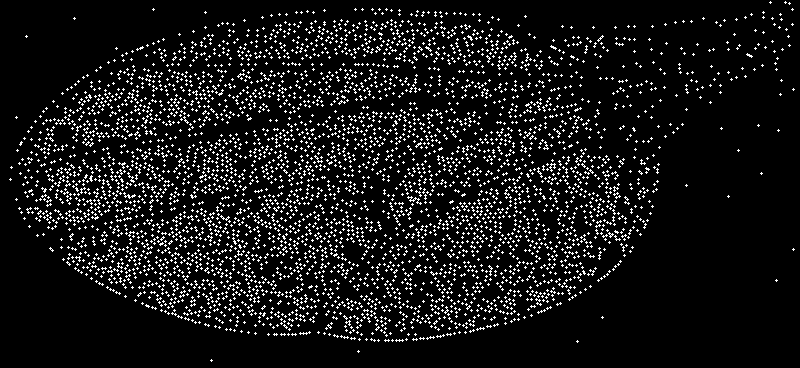

In [4]:
import io.scif.img.ImgOpener
import net.imglib2.img.Img
import net.imglib2.algorithm.gauss.Gauss
import net.imglib2.type.logic.BitType
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.type.numeric.real.FloatType

img = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif").get(0)

// first we do a small in-place gaussian smoothing with a sigma of 1.0
double[] sigmas = [1.0, 1.0]
Gauss.inDoubleInPlace(sigmas, img)

// find local minima and paint them into another image as spheres
featureMap = construct02.findAndDisplayLocalMinima(img, new ArrayImgFactory<BitType>(), new BitType())

# Example 05: Out of bounds

Many algorithms, like convolutions, require to access pixels outside of an [**`Interval`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html), i.e. also pixels outside of an image. In ImgLib2 this is handled using [**`Views`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html), which convert a [**`RandomAccessibleInterval`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessibleInterval.html) into an infinite [**`RandomAccessible`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html) using an [**`OutOfBoundsStrategy`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html). Those infinite [**`RandomAccessibles`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html) are able to return pixel values at any arbitrary location.

*Important: One should never access pixels outside of the defined [**`Interval`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) as it will in most cases result in unexpected behavior, depending on the kind of underlying [**`RandomAccessible`**]((http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html). If it is for example an [**`Img`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), it will return wrong values or throw an exception.*

Which [**`OutOfBoundsStrategies`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) to use depends on the task you want to perform. For convolutions, we suggest using the mirror strategy as it introduces the least artifacts. When working on Fourier images, the periodic strategy applies best as it correctly mimics its spatial properties. Random Value strategies might be useful to avoid accidental correlations, and constant value strategies are the most performant and might work well for simple operations or to avoid exceptions when accidental writing or reading outside of the Interval occurs.

In [2]:
import io.scif.img.ImgOpener
import net.imglib2.RandomAccessible
import net.imglib2.img.Img
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.view.Views
import net.imglib2.FinalInterval
import net.imglib2.outofbounds.OutOfBoundsConstantValueFactory
import net.imglib2.view.ExtendedRandomAccessibleInterval

enum ExtendType {
  EXTEND_VALUE_0,
  EXTEND_VALUE_128,
  EXTEND_RANDOM_256,
  EXTEND_MIRROR_SINGLE,
  EXTEND_MIRROR_DOUBLE,
  EXTEND_PERIODIC,
  EXTEND_RANDOM_CUSTOM
}

// open with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWingSmall.tif", new FloatType()).get(0)

// in order to visualize them, we have to define a new interval
// on them which can be displayed
min = new long[image.numDimensions()]
max = new long[image.numDimensions()]
 
for ( int d = 0; d < image.numDimensions(); ++d ) {
  // we add/subtract another 30 pixels here to illustrate
  // that it is really infinite and does not only work once
  min[d] = -image.dimension( d ) - 90
  max[d] = image.dimension( d ) * 2 - 1 + 90
}

// define the Interval on the infinite random accessibles
interval = new FinalInterval(min, max)

// change this variable to switch for different kind of out-of-bounds display
imgs = [:]
for (type in [ExtendType.EXTEND_VALUE_0,
    ExtendType.EXTEND_VALUE_128,
    ExtendType.EXTEND_RANDOM_256,
    ExtendType.EXTEND_MIRROR_SINGLE,
    ExtendType.EXTEND_MIRROR_DOUBLE,
    ExtendType.EXTEND_PERIODIC,
    ExtendType.EXTEND_RANDOM_CUSTOM])
{
    switch (type) {
      case ExtendType.EXTEND_VALUE_0:
        // create an infinite view where all values outside of the Interval are 0
        infinite = Views.extendValue(image, new FloatType(0))
        s = Views.interval(infinite, interval)
        break
      case ExtendType.EXTEND_VALUE_128:
        // create an infinite view where all values outside of the Interval are 128
        infinite = Views.extendValue(image, new FloatType(128))
        s = Views.interval(infinite, interval)
        break
      case ExtendType.EXTEND_RANDOM_256:
        // create an infinite view where all outside values are random in a range of 0-255
        infinite = Views.extendRandom(image, 0, 255);
        s = Views.interval(infinite, interval)
        break
      case ExtendType.EXTEND_MIRROR_SINGLE:
        // create an infinite view where all values outside of the Interval are
        // the mirrored content, the mirror is the last pixel
        infinite = Views.extendMirrorSingle(image);
        s = Views.interval(infinite, interval)
        break
      case ExtendType.EXTEND_MIRROR_DOUBLE:
        // create an infinite view where all values outside of the Interval are
        // the mirrored content, the mirror is BEHIND the last pixel,
        // i.e. the first and last pixel are always duplicated
        infinite = Views.extendMirrorDouble(image);
        s = Views.interval(infinite, interval)
        break
      case ExtendType.EXTEND_PERIODIC:
        // all values outside of the Interval periodically repeat the image content
        // (like the Fourier space assumes)
        infinite = Views.extendPeriodic(image);
        s = Views.interval(infinite, interval)
        break
      case ExtendType.EXTEND_RANDOM_CUSTOM:
        // if you implemented your own strategy that you want to instantiate, it will look like this
        infinite = new ExtendedRandomAccessibleInterval<FloatType, Img<FloatType>>(
          image, new OutOfBoundsConstantValueFactory<FloatType, Img<FloatType>>(new FloatType(196)));
        s = Views.interval(infinite, interval)
        break
      default:
        infinite = Views.extendValue(image, new FloatType(0))
        s = Views.interval(infinite, interval)
    }
    imgs.put(type, s)
}
imgs

Key Value EXTEND​_VALUE​_0 <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAwwAAAHICAYAAADjmW3wAABQe0lEQVR42u3d6df2bT3/f/+SO/4Ba7nljrUsrLTMIVMZEopEFFGJBsMlUxIlQkQIyTxnLknmuYEm2b+e+69n62X7Hed5Ted11eV6Hms91jHtw2f/7Mc61vv12d7btn3Ih3zIh1ySJEmS5BY6CUmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSdAKSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJOkEJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSAkOSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSFBiSJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSpMCQJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJAWGJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJCkwJEmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEmBIUmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJEkKDEmSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiSJElSYEiS93n3u9/9fu9617ve//V73vOeq//6r/+6eu9733v57//+76s+7swH5/Th8OHfjXjd/l35d4bzbxHvfOc7r97xjndc/uM//uPy9re//X9529ve9v/7/Na3vvXylre85fLv//7vl3/7t3+7/Ou//uvlz/7szy6/9Eu/dHnlK1959cM//MOXxz/+8ZeP//iPv3zSJ33S5eu+7usud9111+W7vuu7Lj/+4z9++Yu/+IvL3/zN3/Q/IkmBIUkszNYWblvQWeht8fdwKXjPwpfzQHFKMfpXf/VXl3/5l3+5/Od//uf1+3/+53++fk3R+Sd/8ieXv/u7v7ve5o1vfOPlD//wDy9//dd/ff3dG97whmtR+g//8A/XgpjH477/9E//dC12eSyeh9+B73luCmjeGwpj3w8++Nm+P/f1Nd7d7TY8nkFg7bHw/QZQbUDgdfHZ1yvOpWHAQGAo2K85ZzIo8L784z/+4+V1r3vd5Xd+53cuv/Vbv3V57Wtfe3nqU596+ZiP+ZjLE57whMtznvOcy7d/+7dffuAHfuDqRS960eUnf/InL29+85v7H5GkwJAkGw42JPjZq8AWgVuMPpChgSLwwbpiz2vwNVJkUuBTuP/mb/7m5ed+7ueuReRzn/vcy7d+67denva0p12vRj/xiU+8fMEXfMHlUz/1Uy+PfvSjL5/yKZ9y+czP/MzLZ33WZ10+93M/9/LYxz726lGPetTVp3/6p19/9xmf8RmXz/7sz758/ud//hX35Wc8HrengOV2j3vc465F7Td+4zdeXvGKV1x+6Id+6Hrl+zu+4zsuv/zLv3z5+Z//+WsB/Nu//duXX//1X7/88R//8TVocOyEFMKJr4XXxtV5PijIz/fsplGk29lQsAFiP/t459d+v39bZ2DdoACOndfye7/3e5fXv/711zBgSNAGBcOCgYH3ktBAUCOk/cIv/ML7z//Xfu3XXr7lW77lGhq+53u+5/JjP/Zj13P94he/+Bry+h+RpMCQpMAwV3h3NGFbkm4qJB+sNpZ788Gx3pPH9Wo9heSv/uqvXn76p3/68pKXvOQaBJ70pCddC//P+ZzPuXzxF3/x5cu+7Muunyn4QUigsCcoUMw///nPv4aJr/mar7k85SlPuTzvec+7fOd3fue14ORKNS0uFKP+/IUvfOG16OeKNvfj/k9/+tMvz3rWs66P98xnPvP6/ZOf/OTrz/ie4/qmb/qmy1d8xVdcf84xPeYxj7l83ud93uWLvuiLruHiS7/0S6/HRdjgeA0lPO+3fdu3XX7iJ37i8qpXvep61fz3f//3r+GC95fzwdV7fke4uCkcOKJyhgE++3dD0W7ouik0nG1Iji4YGLb1yKDgyIKjCxT/hKPv/u7vvoa4P/3TP72GA14LQeJ3f/d3L69+9auvLUfcjsDH94wWcB5oQQIh7WM/9mOv5/Arv/Irr+eU9+/rv/7rr21LBAruR8Dof0SSAkOSh72bAsK61VXnh8qHowVcdacd5Qd/8AevV5W5qs+oAFf0P+ETPuFaeDMyQPH9jGc841rIM6LA7bnq/LKXvezyoz/6o9cRB77nKj8FKY9L4frnf/7n16vXf/mXf3m9Ms0Vba7y23bE1/yO21Hcgq/prefrP/iDP7heQecYedxf+7Vfu/zMz/zMdVSBQMPXhBqughM6KJpf8IIXXL7hG77h8uVf/uXXIMNnQgSjIFw1J6wQTvieopjX94Vf+IXXYEIB/bM/+7PXopj3mOOlr//lL3/59ThomeLKPlftaZmiYOe2vBZ+9rd/+7fXgp+g8KY3vela6PM6OBe2alnoEwgo7AkEBgbuSyDgsXz9hJm///u/v55TCvZf+ZVfufzRH/3R9fe0FP3Gb/zG9ZwRDL73e7/38smf/MnvD2nf933fd/n+7//+y0tf+tJrWCMAcC74Pa+fAEgY5L3/ki/5kstHfuRHXj7qoz7q8nEf93GXRzziEdfRHG7LPAaOhfeqwJCkwJAkM8JwU2g4+9Bv6nn/YPqgAKXgpKilT50Ckqv0XEmmYKSoJiCAgpqikoKbwpq2HwpoCnaKXh6Dwp+ikUIWFMkU+BT//JzfOwfBYper4OdnfsdtLLhBkOH3PCYFt9+ft+X3fOZ3PJ/HxDHwtYUtwYRjo02J18GIAq+fApjRjG/+5m++BiCKYopmXjsjEox+UJjbxkOxzLlilIXCmvtwbn7kR37kGpJ4jp/6qZ+6tkJxjhmt4HxxZZ6Qwf25Lb+n2OdqPQGI2zCaQxAinPCaOdf87DWvec21xYrj/aqv+qrr

# Example 06a:  Gaussian convolution

**Note:** ImgLib2 contains a growing number of built-in standard algorithms. In examples 06a, 06b, and 06c, we will show some of those, illustrate how to use them and give some examples of what they might be used for.

Typically algorithms provide static methods for simple calling, but they also have classes which you can instantiate yourself to have more options.

*Important: Algorithms do not allow to work on a different dimensionality than the input data. You can achieve that by selecting hyperslices using [Views](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) (see Example 6a - variation 4). In this way, you can for example apply two-dimensional gaussians to each frame of a movie independently.*

The Gaussian convolution has its own [wiki](http://imagej.net/Gauss_Package_ImgLib2) page. You can apply the Gaussian convolution with different sigmas in any dimension. It will work on any kind of [**`RandomAccessibleInterval`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessibleInterval.html). Below we show examples of a simple gaussian convolution (variation 1), convolution using a different [**`OutOfBoundsStrategy`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html) (variation 2), convolution of a part of an [**`Interval`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) (variation 3), and convolution of in a lower dimensionality than the image data (variation 4).

## Example 6a - Gaussian convolution (variation 1 - simple)

Here, we simply apply a Gaussian convolution with a sigma of 8. Note that it could be applied in-place as well when calling *Gauss.inFloatInPlace(...)*. The Gaussian convolution uses by default the **`OutOfBoundsMirrorStrategy`**.

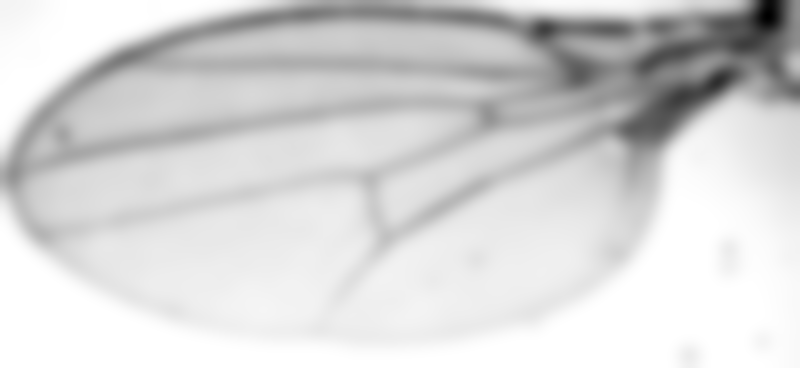

In [1]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.algorithm.gauss.Gauss
import net.imglib2.img.Img

// open with ImgOpener as a FloatType
Img<FloatType> image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new
  FloatType()).get(0)

// perform gaussian convolution with float precision
sigma = new double[image.numDimensions()]

for (int d = 0; d < image.numDimensions(); ++d) {
  sigma[d] = 8.0
}

output = Gauss.toFloat(sigma, image)

## Example 6a - Gaussian convolution (variation 2 - different OutOfBoundsStrategy)

Here we use an **OutOfBoundsStrategyConstantValue** instead. It results in continuously darker borders as the zero-values from outside of the image are used in the convolution. Note that the computation is done in-place here. However, we still need to provide an [ImgFactory](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/ImgFactory.html) as the Gaussian convolution needs to create temporary image(s) - except for the one-dimensional case.

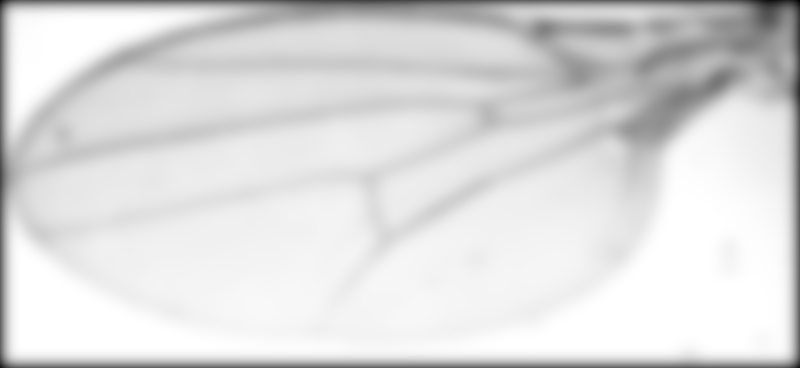

In [2]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.view.Views
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.algorithm.gauss3.Gauss3

// open with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)

// first extend the image to infinity, zeropad
infiniteImg = Views.extendValue(image, new FloatType())

// now we convolve the whole image manually in-place
// note that it is basically the same as the call above, just called in a more generic way
//
// sigma .. the sigma
// infiniteImg ... the RandomAccessible that is the source for the convolution
// image ... defines the RandomAccessibleInterval that is the target of the convolution
Gauss3.gauss(sigma, infiniteImg, image)

image

## Example 6a - Gaussian convolution (variation 3 - only part of an Interval)

Here we only convolve part of an [**Interval**](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html), or in this case part of the [**Img**](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html). Note that for convolution, it will actually use the real image values outside of the defined [**Interval**](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html). The **OutOfBoundsStrategy** is only necessary if the kernel is that large so that it will actually grep image values outside of the underlying [**Img**](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html).

Note: if you wanted, you could force it to use an **OutOfBoundsStrategy** directly outside of the [**Interval**](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html). For that you would have to create an [**RandomAccessibleInterval**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessibleInterval.html) on the [**Img**](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html), extend it by an **OutOfBoundsStrategy** and give this as input to the Gaussian convolution.

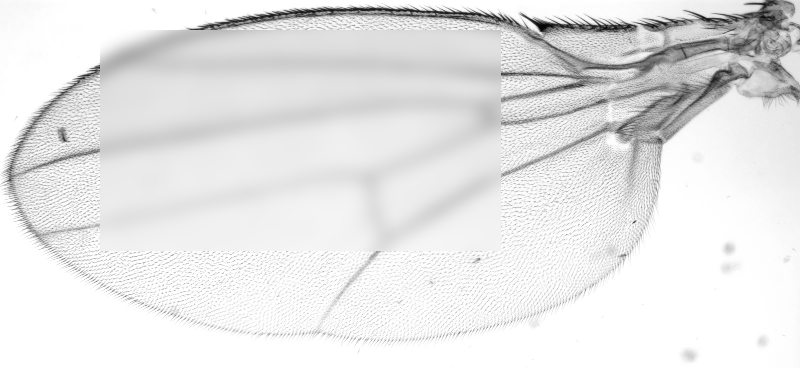

In [3]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.view.Views
import net.imglib2.algorithm.gauss3.Gauss3
import net.imglib2.util.Intervals

// open with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)

// we need to extend it nevertheless as the algorithm needs more pixels from around
// the convolved area and we are not sure how much exactly (although we could compute
// it with some effort from the sigma).
// Here we let the Views framework take care of the details. The Gauss convolution
// knows which area of the source image is required, and if the extension is not needed,
// it will operate on the original image with no runtime overhead.
infiniteImg = Views.extendMirrorSingle(image)
 
// define the area of the image which we want to compute
interval = Intervals.createMinMax(100, 30, 500, 250)
region = Views.interval(image, interval)

 // call the gauss, we convolve only a region and write it back to the exact same coordinates
 Gauss3.gauss(sigma, infiniteImg, region)

image

## Example 6a - Gaussian convolution (variation 4 - with a lower dimensionality)

This example shows how to apply an algorithm to a lower dimensionality as the image data you are working on. Therefore we use [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html)s to create HyperSlices which have n-1 dimensions. We simply apply the algorithm in-place on those [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html)s which will automatically update the image data in the higher-dimensional data.

Specifically, we apply 1-dimensional Gaussian convolution in 30-pixel wide stripes using a sigma of 16. Note that whenever you request a HyperSlice for a certain dimension, you will get back a [View](http://javadoc.imagej.net/ImgLib2/net/imglib2/View.html) that contains all dimensions but this one.

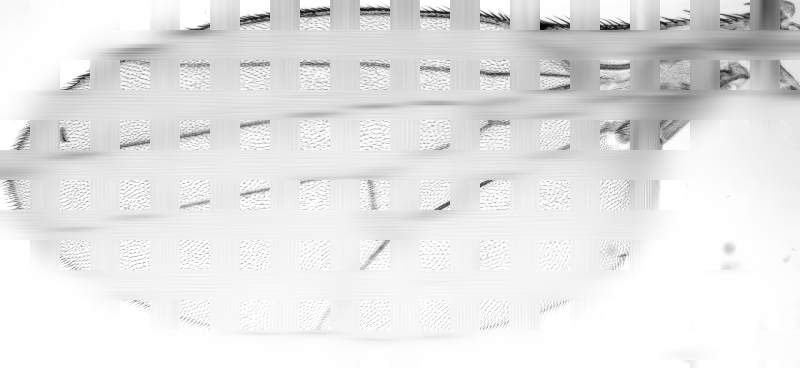

In [4]:
import io.scif.img.ImgOpener
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.view.Views
import net.imglib2.algorithm.gauss3.Gauss3
import net.imglib2.util.Intervals

// open with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)

double[] sigma = new double[image.numDimensions() - 1]

for (int d = 0; d < sigma.length; ++d) {
  sigma[d] = 16.0
}
 
// iterate over all dimensions, take always a hyperslice
for (int dim = 0; dim < image.numDimensions(); ++dim) // iterate over all possible hyperslices
{
  for (long pos = 0; pos < image.dimension(dim); ++pos) // convolve a subset of the 1-dimensional views
  {
    long s = pos / 30
    if (s % 2 == 1) {
      // get the n-1 dimensional "slice"
      view = Views.hyperSlice(image, dim, pos)
      
      // compute the gauss in-place on the view
      Gauss3.gauss(sigma, Views.extendMirrorSingle(view), view)
    }
  }
}

image

## Example 6b - Convolution in Fourier space

In image processing, it is sometimes necessary to convolve images with non-separable kernels. This can be efficiently done in Fourier space exploiting the convolution theorem. It states that a convolution in real-space corresponds to a multiplication in Fourier-space, and vice versa. Note that the computation time for such a convolution is independent of the size and shape of the kernel.

*Note: that it is useful to normalize the kernel prior to Fourier convolution so that the sum of all pixels is one. Otherwise, the resulting intensities will be increased.*

Some utility methods can be found below.

In [3]:
import net.imglib2.type.numeric.RealType
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.util.RealSum

utility = new Object() {
  /**
   * Computes the sum of all pixels in an iterable using RealSum
   *
   * @param <T> value type
   * @param iterable - the image data
   * @return - the sum of values
   */
  public <T extends RealType<T>> double sumImage(final Iterable<T> iterable) {
    final RealSum sum = new RealSum()
    
    for (final T type : iterable) {
      sum.add(type.getRealDouble())
    }
    
    return sum.getSum()
  }
  
  /**
   * Norms all image values so that their sum is 1
   *
   * @param iterable - the image data
   */
  public void norm(final Iterable<FloatType> iterable) {
    final double sum = sumImage(iterable)
    
    for (final FloatType type : iterable) {
      type.setReal(type.get() / sum)
    }
  }
}

Script2​$1​@23dfdd82

The implementation is as follows...

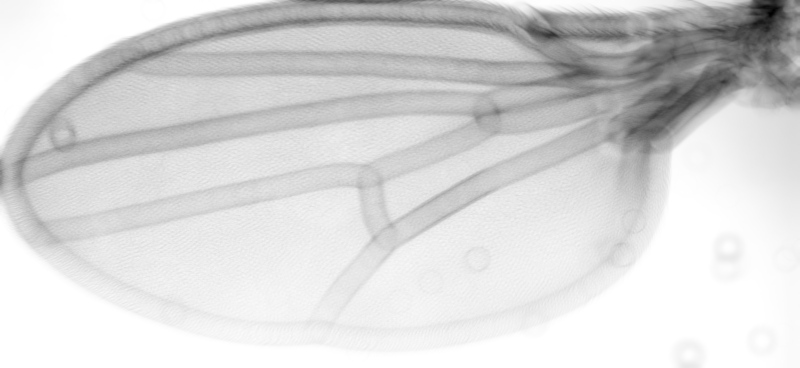

In [4]:
// NB: The imglib2-algorithm-gpl component is licensed under the GPL;
//     therefore, this code snippet is also licensed under the GPL!
#@dependency(group = "net.imglib2", module = "imglib2-algorithm-gpl", version = "0.2.1")

import io.scif.img.ImgOpener
import net.imglib2.img.Img
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.algorithm.fft2.FFTConvolution
import net.imglib2.view.Views
import net.imglib2.RandomAccessibleInterval

// open image and kernel with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)
kernel = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/kernelRing.tif",new FloatType()).get(0)

// normalize the kernel, otherwise we add energy to the image
utility.norm(kernel)

// compute & show fourier convolution (in-place)
fft2 = new FFTConvolution<FloatType>(image, kernel)
fft2.convolve()

image

## Example 6c - Complex numbers and Fourier transforms

In this example we show how to work with complex numbers and Fourier transforms. We show how to determine the location of a template in an image exploiting the *Fourier Shift Theorem*. We therefore compute the Fast Fourier Transform of a template, invert it and convolve it in Fourier space with the original image.

Computing an FFT is straight forward. It does not offer a static method because the instance of the FFT is required to perform an inverse FFT. This is necessary because the input image needs to be extended to a size supported by the 1-d FFT method (edu_mines_jtk.jar). In order to restore the complete input image, remembering those parameters is essential.

Note that for inverting the kernel we use methods defined for [**`ComplexType`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/type/numeric/ComplexType.html), also the basic math operations add, mul, sub and div are implemented in complex math. The inverse FFT finally takes the instance of the FFT as a parameter from which it takes all required parameters for a correct inversion.

The final convolution of the inverse template with the image is performed using the FourierConvolution (see example 6b). Note that all possible locations of the template in the image have been tested. The peak in the result image clearly marks the location of the template, while the computation time for the whole operation takes less than a second.

Some utility methods can be found below.

In [1]:
import net.imglib2.type.numeric.RealType
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.util.RealSum

utility = new Object() {
  /**
   * Computes the sum of all pixels in an iterable using RealSum
   *
   * @param <T> value type
   * @param iterable - the image data
   * @return - the sum of values
   */
  public <T extends RealType<T>> double sumImage(final Iterable<T> iterable) {
    final RealSum sum = new RealSum()
    
    for (final T type : iterable) {
      sum.add(type.getRealDouble())
    }
    
    return sum.getSum()
  }
  
  /**
   * Norms all image values so that their sum is 1
   *
   * @param iterable - the image data
   */
  public void norm(final Iterable<FloatType> iterable) {
    final double sum = sumImage(iterable)
    
    for (final FloatType type : iterable) {
      type.setReal(type.get() / sum)
    }
  }
}

Script1​$1​@27ebfc03

The implementation is as follows...

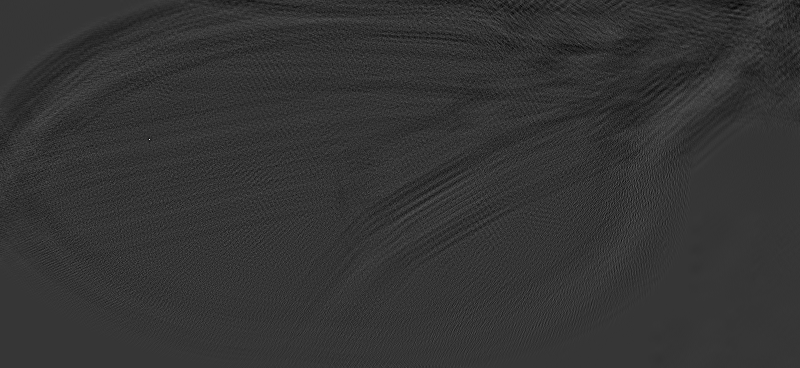

In [4]:
// NB: The imglib2-algorithm-gpl component is licensed under the GPL;
//     therefore, this code snippet is also licensed under the GPL!
#@dependency(group = "net.imglib2", module = "imglib2-algorithm-gpl", version = "0.2.1")

import io.scif.img.ImgOpener
import net.imglib2.type.numeric.complex.ComplexFloatType
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.algorithm.fft.FourierConvolution
import net.imglib2.algorithm.fft.FourierTransform
import net.imglib2.algorithm.fft.InverseFourierTransform

// open image and kernel with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)
template = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/WingTemplate.tif", new FloatType()).get(0)

fft = new FourierTransform<FloatType, ComplexFloatType>(template, new ComplexFloatType())
fft.process()
templateFFT = fft.getResult()

// complex invert the kernel
ComplexFloatType c = new ComplexFloatType()
for (ComplexFloatType t : templateFFT) {
  c.set(t)
  t.complexConjugate()
  c.mul(t)
  t.div(c)
}

// compute inverse fourier transform of the template
ifft = new InverseFourierTransform<FloatType, ComplexFloatType>(templateFFT, fft);
ifft.process()
templateInverse = ifft.getResult()

// normalize the inverse template
utility.norm(templateInverse)

// compute fourier convolution of the inverse template and the image
output = FourierConvolution.convolve(image, templateInverse)

The position where the template was located in the image is significantly visible: the brightest spot in the image.

# Example 07: Interpolation

Interpolation is a basic operation required in many image processing tasks. In the terminology of ImgLib2 it means to convert a [**`RandomAccessible`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html) into a [**`RealRandomAccessible`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccessible.html) which is able to create a [**`RealRandomAccess`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccess.html). It can be positioned at real coordinates instead of only integer coordinates and return a value for each real location. 

Currently, three interpolation schemes are available for ImgLib2:
  * Nearest neighbor interpolation (also available for any kind of data that can return a nearest neighbor like sparse datasets)
  * Linear interpolation
  * Lanczos interpolation

In the example, we magnify a given real interval in the [**`RealRandomAccessible`**](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccessible.html) which is based on the interpolation on an [Img](http://javadoc.imagej.net/ImgLib2/net/imglib2/img/Img.html) and compare the results of all three interpolation methods.

Below is the utility method for a given interval magnification.

In [1]:
import net.imglib2.type.Type
import net.imglib2.RealRandomAccessible
import net.imglib2.RealInterval
import net.imglib2.img.ImgFactory
import net.imglib2.img.Img

mag = new Object() {
  /**
   * Compute a magnified version of a given real interval
   *
   * @param <T> value type
   * @param source - the input data
   * @param interval - the real interval on the source that should be
   * magnified
   * @param factory - the image factory for the output image
   * @param magnification - the ratio of magnification
   * @return - an Img that contains the magnified image content
   */
  public <T extends Type<T>> Img<T> magnify(
    RealRandomAccessible<T> source,
    RealInterval interval,
    ImgFactory<T> factory,
    double magnification) {
    
    numDimensions = interval.numDimensions()
    
    // compute the number of pixels of the output and the size of the real interval
    pixelSize = new long[numDimensions]
    intervalSize = new double[numDimensions]
    
    for (int d = 0; d < numDimensions; ++d) {
      intervalSize[d] = interval.realMax(d) - interval.realMin(d)
      pixelSize[d] = Math.round(intervalSize[d] * magnification) + 1
    }
    
    // create the output image
    output = factory.create(pixelSize, source.realRandomAccess().get())
    
    // cursor to iterate over all pixels
    cursor = output.localizingCursor()
    
    // create a RealRandomAccess on the source (interpolator)
    realRandomAccess = source.realRandomAccess()
    
    // the temporary array to compute the position
    tmp = new double[numDimensions]
    
    // for all pixels of the output image
    while (cursor.hasNext()) {
      cursor.fwd()
      
      // compute the appropriate location of the interpolator
      for (int d = 0; d < numDimensions; ++d) {
        tmp[d] = cursor.getDoublePosition(d) / output.realMax(d) * intervalSize[d] + interval.realMin(d)
      }
      
      // set the position
      realRandomAccess.setPosition(tmp)
      
      // set the new value
      cursor.get().set(realRandomAccess.get())
    }
    
    return output
  }
}

Script1​$1​@79ecdf7f

The below code uses three different interpolators to 10x magnify a small area.

In [5]:
import io.scif.img.ImgOpener
import net.imglib2.FinalRealInterval
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.interpolation.randomaccess.LanczosInterpolatorFactory
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory
import net.imglib2.interpolation.randomaccess.NearestNeighborInterpolatorFactory
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.view.Views

enum InterpolationType {
  NEAREST_NEIGHBOR_INTERPOLATION,
  NLINEAR_INTERPOLATION,
  LANCZOS_INTERPOLATION
}

// open with ImgOpener as a FloatType
image = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)

// define the area in the interpolated image
double[]min = [105.12, 40.43]
double[]max = [129.56, 74.933]

interval = new FinalRealInterval(min, max)

imgs = [:]
for (interpolant_type in
    [InterpolationType.NEAREST_NEIGHBOR_INTERPOLATION,
    InterpolationType.NLINEAR_INTERPOLATION,
     InterpolationType.LANCZOS_INTERPOLATION])
{
    // create a RandomAccessible using the factory and views method
    // it is important to extend the image first, the interpolation scheme might
    // grep pixels outside of the boundaries even when locations inside are queried
    // as they integrate pixel information in a local neighborhood - the size of
    // this neighborhood depends on which interpolator is used
    switch (interpolant_type) {
      case InterpolationType.NEAREST_NEIGHBOR_INTERPOLATION:
        // create an InterpolatorFactory RealRandomAccessible using nearst neighbor interpolation
        nn_inter_factory = new NearestNeighborInterpolatorFactory<FloatType>()
        nn_interpolant = Views.interpolate(Views.extendMirrorSingle(image), nn_inter_factory)
        img = mag.magnify(nn_interpolant, interval, new ArrayImgFactory<FloatType>(), 10)
        break
      case InterpolationType.NLINEAR_INTERPOLATION:
        // create an InterpolatorFactory RealRandomAccessible using linear interpolation
        linear_inter_factory = new NLinearInterpolatorFactory<FloatType>()
        nlinear_interpolant = Views.interpolate(Views.extendMirrorSingle(image), linear_inter_factory)
        img = mag.magnify(nlinear_interpolant, interval, new ArrayImgFactory<FloatType>(), 10)
        break
      case InterpolationType.LANCZOS_INTERPOLATION:
        // create an InterpolatorFactory RealRandomAccessible using lanczos interpolation
        lanczos_inter_factory = new LanczosInterpolatorFactory<FloatType>()
        lanczos_interpolant = Views.interpolate(Views.extendMirrorSingle(image), lanczos_inter_factory)
        img = mag.magnify(lanczos_interpolant, interval, new ArrayImgFactory<FloatType>(), 10)
        break
      default:
        nn_inter_factory = new NearestNeighborInterpolatorFactory<FloatType>()
        nn_interpolant = Views.interpolate(Views.extendMirrorSingle(image), nn_inter_factory)
        img = mag.magnify(nn_interpolant, interval, new ArrayImgFactory<FloatType>(), 10)
    }
    imgs.put(interpolant_type, img)
}
[imgs]

NEAREST​_NEIGHBOR​_INTERPOLATION NLINEAR​_INTERPOLATION LANCZOS​_INTERPOLATION <img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAPUAAAFaCAYAAADGjBvqAAAPp0lEQVR42u3dYWiV9RvHYYmIwqQoWGgkI0IIjSLCmGGkVCQsgorChlLSoLAwSJJNEBIVZcbExDAxluQwVCY1FiqGSoXiRjLFWEPZwslER7KNhUXtz3kng+Db9vzZsuuBz9tzds55rmdvbu7fpOH/8/XXX39Fjdfl7/t3fi+uv78m3agfLL0pi+7PP/8cl1wuqKF2QQ011C6ooYbaBTXUULughhpqF9RQu6CGGmoX1FBD7YIaaqhdUP/dVTSaP/74Y0JnrNMFNdQuqKGG2gU11FC7oIYaahfUUEPtghpqF9RQQ+2CGmqoXVBDDbXrv4c6vXlTDOOF//fff48ar9dzQQ011C6ooYbaBTXUULughhpqqKGGGmqooYbaBTXUULughhpqF9RQQw011BOtFOtvv/0Wlb5v0QsZJ/r9ciMdaQw11FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdQTF/V4HQFb9Hhl0V27di0q/RxFv56Fh//ehwnUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FD/+1GPF8Ki3zfFNV6ln6PocdIbBVfR30vRD9nSbwc11FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdQTF3V6Fb2I70YpXShYNOqJPiZa9PsWjbq/vz9qYGAg6tKlS1G9vb1QQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEN9A6BOr6IX8Y3X2GmKdWhoqNDS9y36KOCixyGLvg/S76Wvry+qpaUlavXq1VHV1dVRL774ItRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUP+HUE/0RYbpzVF0RR9lW/QYZvq+g4ODUT09PVFnzpyJam1tjTpx4kTUkSNHog4cOBDV3NwctXv3bqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooZ7AqCf6YrqixxxThEUfjVv0WGfRiyDTz9Hd3R21Z8+eqNra2qjXXnstat68eVGzZs2KKi8vj7rvvvuiysrKoIYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGG+gZAPdErGk3RiwyLHndNEaZHsaZHu6aL/bq6uqLOnj0b1d7eHnX8+PGo0rhmUn19fdT7778fVVlZCTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011DcA6vQqeswx/fsm+oLCFE1vb29UZ2dn1NGjR6MaGhqiampqohYtWhQ1f/78qIqKiqgHH3wwasaMGVHTp0+PmjlzZtSTTz4JNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUExh10VjTq+hFgenY5NDQUFT6einC/fv3R6XjhgsXLox67rnnolI0Dz30UFSKYdq0aVF333131OTJk6OmTJkSlS4oXLp0adSyZcughhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYZ6AqMueky06EV8ly9fjkrHJk+dOhV1+PDhqPTI1s2bN0etXLkyKh3XTFu/fn3UqlWrol599dWoZ599Nurll1+OSl8vraqqKmrNmjVRdXV1UEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDfQOgTkvHKy9evBi1Y8eOqBUrVkQtXrw46vnnn4+aM2dOVDpe+cADD0Sl45XpOOTNN99caGVlZVEp/tmzZ0el7/vMM89EpQ+7pqamOKihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooS4OddEIiz4qNkU9ODgYdfXq1ah0AWD6MOnq6orq6OiISsdTjxw5EtXY2BiVjp0uWLAg6p577omaOnVq1Ny5c6Oqq6ujli9fHpW+Xm1tbdS2bduiPv74Y6ihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooS4QddFHz6ZHxaZHwPb390f19PREpQsF29raovbu3Ru1bt26qCVLlkSl46T33ntvVHl5eVR65G1lZWXUK6+8EvXOO+9EpUf3pg+n7du3R23ZsiUqHRMtYU365JNPoIYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGegyo06NhR5aOYaZHxaZo0i8rXQD46KOPRqU3ebqYbvLkyVG33XZbVLqw76677opKxzUffvjhqBkzZkQ99dRTUe+9917Uxo0bozZs2BCVHim7adOmqPQhkbZ161aooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKEeA+qRi/3Ssc6+vr6ogwcPRqV/9M6dOwstfd9ly5ZFpYvu0qNO0/dNb/K333476sMPP4xKMaxduzYq/byvv/56VE1NTVTRY51p9fX1UeniwdWrV0MNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDfUYUF+4cGH4+n7++eeo1tbWqKampqgPPvggat68eVHpmOOtt94aNWnSpKh0XDMdm3z66aejHnnkkaiqqqqodBFfiiZ9vfQ+eOutt6IqKiqi0odi+hBLx0TTxYjpw7j03UANNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDfXoUY8cg3vhhRei7r///qipU6dGpQv20sV5jz32WNSsWbOi0kWBKf4pU6ZE3XHHHVFPPPFEVHV1dVR6E73xxhtR6cMk/d3Sh2J6NG46JpoeKZuOiaYPicbGxqjSEkWooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKEePepp06YNX196s91yyy1RKdabbropKh3/nD17dlQ6hrl06dKodHHe8uXLo9KH7LvvvhtVV1cXtWrVqqhFixZFpWOiH330UVTpyNakdevWRaXjzOkizX379kUdOHAg6tChQ1Gl14QaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGurRox451pmimTlzZlRZWVnUnXfeGTV//vyodKFbunCudERo0ksvvRSVLlBMF+ylC/vWrFkTlY5Nfvnll1G7d+8utJMnT0adPn06qqOjI+rrr7+OOnPmTNRPP/0U1dLSEtXc3Aw11FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRjQH377bcPX1+6iC9d/DZ37tyodNFdfX19VDrmWFlZGVVeXh71+OOPR6ULANPPmyJMSxfdffbZZ1Hbtm2L2rVrV9QPP/wQlY5hpu9bQpOUHgnd2dkZ1dvbG9XT0wM11FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRQQw011FBDDTXUUEMNNdRjQD19+vTh65szZ05UumCvtrY2qqamJirFnx7tWlFREfXmm29GpZ83XQCYlmJtbW2NStF89dVXUenYZHt7e1Q6rnns2LGo8+fPR506dSoq/f6OHz9eaIcPH4YaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGmqooYYaaqihhhpqqKGGGuoxoF6wYMHw9aUL+9IFdulRoulRrAsXLoxKj1hNFw82NDREpV9+W1tbVLo4L73Z0kV3586di0oxdHV1FdqlS5eiLl++HNXd3R2Vfs/fffdd1J49

The nearest neighbor interpolation is the fastest to compute and is the most versatile as it requires no computation, but just a lookout. The result is, however, very pixelated. The linear interpolation produces reasonable results and computes quite fast. The Lanczos interpolation shows the most visually pleasing results, but also introduces slight artifacts in the background.

# Example 08: Working with sparse data

ImgLib2 supports sparsely sampled data, i.e. collections of locations together with their value. Such datasets typically implement the [IterableRealInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableRealInterval.html) interface, which means they can be iterated and have real-valued locations in n-dimensional space. Currently ImgLib2 supports to store such collections either as list ([RealPointSampleList](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealPointSampleList.html)) or [KDTree](http://javadoc.imagej.net/ImgLib2/net/imglib2/KDTree.html). The [RealPointSampleList](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealPointSampleList.html) can be iterated, whereas the [KDTree](http://javadoc.imagej.net/ImgLib2/net/imglib2/KDTree.html) additionally supports three efficient ways of searching for nearest neighboring points in the n-dimensional space ([NearestNeighborSearch](http://javadoc.imagej.net/ImgLib2/net/imglib2/neighborsearch/NearestNeighborSearch.html), [KNearestNeighborSearch](http://javadoc.imagej.net/ImgLib2/net/imglib2/neighborsearch/KNearestNeighborSearch.html), and [RadiusNeighborSearch](http://javadoc.imagej.net/ImgLib2/net/imglib2/neighborsearch/RadiusNeighborSearch.html)).

In order to display sparse data ImgLib2 currently supports two interpolation schemes, the [NearestNeighborInterpolation](http://javadoc.imagej.net/ImgLib2/net/imglib2/interpolation/randomaccess/NearestNeighborInterpolator.html) and the [InverseDistanceWeightingInterpolation](http://javadoc.imagej.net/ImgLib2/net/imglib2/interpolation/neighborsearch/InverseDistanceWeightingInterpolator.html). They can compute a value for every location in space by returning either the value of the closest sample or an interpolated, distance-weighted value of the k nearest neighbors to the sampled location. The interpolation scheme therefore converts any [IterableRealInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/IterableRealInterval.html) into a [RealRandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccessible.html) that can be displayed by wrapping it into a [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html) and defining [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) using [Views](http://javadoc.imagej.net/ImgLib2/net/imglib2/view/Views.html).

*This is, however, not only useful for display. Note that you execute on such data any algorithm or method that is implemented for [RealRandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccessible.html) or [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), like Gaussian convolution in the first example. **Note that none of these ever exists in memory, it is done completely virtual on just the sparse samples.***

## Example 8a - Create random sparse data, display and convolve it

In this example we create a certain number of random samples with random intensities inside a certain [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html). Using nearest neighbor interpolation we wrap it into a [RealRandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RealRandomAccessible.html), wrap it again into a [RandomAccessible](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessible.html), define an [Interval](http://javadoc.imagej.net/ImgLib2/net/imglib2/Interval.html) on it and display it. On the same virtual data we perform a Gaussian convolution and show it, too.

Below is the utility method for a given interval magnification.

In [1]:
import net.imglib2.RealInterval
import net.imglib2.RealPointSampleList
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.RealPoint

obj = new Object() {
  /**
   * Create a number of n-dimensional random points in a certain interval
   * having a random intensity 0...1
   *
   * @param interval - the interval in which points are created
   * @param numPoints - the amount of points
   *
   * @return a RealPointSampleList (which is an IterableRealInterval)
   */
  public RealPointSampleList<FloatType> createRandomPoints(RealInterval interval, int numPoints) {
    // the number of dimensions
    numDimensions = interval.numDimensions()
    
    // a random number generator
    Random rnd = new Random(System.currentTimeMillis())
    
    // a list of Samples with coordinates
    RealPointSampleList<FloatType> elements = new RealPointSampleList<FloatType>(numDimensions)
    
    for (int i = 0; i < numPoints; ++i) {
      RealPoint point = new RealPoint(numDimensions)
      
      for (int d = 0; d < numDimensions; ++d) {
        point.setPosition( rnd.nextDouble() * (interval.realMax(d) - interval.realMin(d)) + interval.realMin(d), d )
        
        // add a new element with a random intensity in the range 0...1
        elements.add(point, new FloatType(rnd.nextFloat()))
      }
    }
    return elements
  }
}

Script1​$1​@15bf0fc2

At first it shows nearest-neighbor rendered random sparse data.

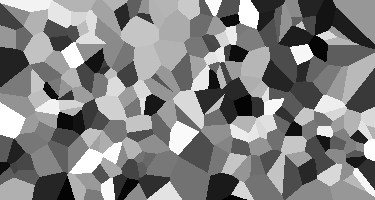

In [2]:
import net.imglib2.FinalInterval
import net.imglib2.IterableRealInterval
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.neighborsearch.NearestNeighborSearch
import net.imglib2.neighborsearch.NearestNeighborSearchOnKDTree
import net.imglib2.KDTree
import net.imglib2.interpolation.neighborsearch.NearestNeighborSearchInterpolatorFactory
import net.imglib2.view.Views

long[] range = [375, 200]
// the interval in which to create random points
interval = new FinalInterval(range)

// create an IterableRealInterval
 IterableRealInterval<FloatType> realInterval = obj.createRandomPoints(interval, 250)

// using nearest neighbor search we will be able to return a value an any position in space
search = new NearestNeighborSearchOnKDTree<FloatType>(new KDTree<FloatType>(realInterval))

// make it into RealRandomAccessible using nearest neighbor search
realRandomAccessible = Views.interpolate(search, new NearestNeighborSearchInterpolatorFactory<FloatType>())

// convert it into a RandomAccessible which can be displayed
randomAccessible = Views.raster(realRandomAccessible)

// set the initial interval as area to view
view = Views.interval(randomAccessible, interval)

At second it shows the result of a Gaussian convolution, run directly on the virtual [RandomAccessibleInterval](http://javadoc.imagej.net/ImgLib2/net/imglib2/RandomAccessibleInterval.html).

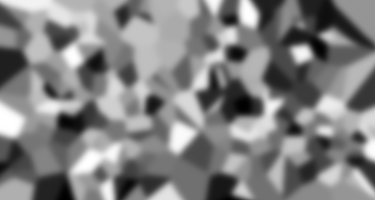

In [3]:
import net.imglib2.img.array.ArrayImgFactory
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.algorithm.gauss.Gauss
import net.imglib2.Point

// compute a gauss on it
convolved = new ArrayImgFactory<FloatType>().create(interval, new FloatType())

double[] size = [3, 3]

Gauss.inFloat(size, view, interval, convolved, new Point(view.numDimensions() ), convolved.factory())

// display the convolved view
convolved

## Example 8b - Randomly sample an existing image and display it

In this example we sample an existing image at random locations and render the result using a nearest neighbor interpolation as well as a distance-weighted average of the k nearest neighbors.

Below is the utility method for a given interval magnification.

In [1]:
import net.imglib2.Interval
import net.imglib2.RealInterval
import net.imglib2.RealPointSampleList
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.type.numeric.RealType
import net.imglib2.RealPoint
import net.imglib2.RealRandomAccessible
import net.imglib2.type.Type
import net.imglib2.KDTree
import net.imglib2.RandomAccessibleInterval
import net.imglib2.neighborsearch.KNearestNeighborSearch
import net.imglib2.neighborsearch.KNearestNeighborSearchOnKDTree
import net.imglib2.neighborsearch.NearestNeighborSearchOnKDTree
import net.imglib2.interpolation.neighborsearch.InverseDistanceWeightingInterpolatorFactory
import net.imglib2.interpolation.neighborsearch.NearestNeighborSearchInterpolatorFactory
import net.imglib2.view.Views

obj = new Object() {
  /**
   * Sample a number of n-dimensional random points in a certain interval having a * random intensity 0...1
   *
   * @param interval - the interval in which points are created
   * @param numPoints - the amount of points
   *
   * @return a RealPointSampleList (which is an IterableRealInterval)
   */
  public <T extends Type<T>> RealPointSampleList<T> sampleRandomPoints(RealRandomAccessible<T> input, RealInterval interval, int numPoints) {
    // the number of dimensions
    numDimensions = interval.numDimensions()
    
    // a random number generator
    rnd = new Random(1332441549191l)
    
    // a list of Samples with coordinates
    elements = new RealPointSampleList<T>(numDimensions)
    
    // a random accessible in the image data to grep the right value
    realRandomAccess = input.realRandomAccess()
    
    for (int i = 0; i < numPoints; ++i) {
      point = new RealPoint( numDimensions)
      
      for (int d = 0; d < numDimensions; ++d) {
        point.setPosition(rnd.nextDouble() * (interval.realMax(d) - interval.realMin(d)) + interval.realMin(d), d)
      }
      
      realRandomAccess.setPosition(point)
      
      // add a new element with a random intensity in the range 0...1
      elements.add(point, realRandomAccess.get().copy())
    }
    return elements
  }
  
  /**
   * Sample randomly n points from the input and display the interpolated result using nearest neighbors
   *
   * @param input - the input data
   * @param interval - the size of the input (where to collect random samples)
   * @param numPoints - how many points to sample
   *
   * @return - a RandomAccessibleInterval of the same size as the input, rendered from the sparse data
   */
  public <T extends Type<T>> RandomAccessibleInterval<T> randomSampling(RealRandomAccessible<T> input, Interval interval, int numPoints) {
    // create an IterableRealInterval
    realInterval = sampleRandomPoints(input, interval, numPoints)
    
    // using nearest neighbor search we will be able to return a value an any position in space
    search = new NearestNeighborSearchOnKDTree<T>(new KDTree<T>(realInterval))
    
    // make it into RealRandomAccessible using nearest neighbor search
    realRandomAccessible = Views.interpolate(search, new NearestNeighborSearchInterpolatorFactory<T>())
    
    // convert it into a RandomAccessible which can be displayed
    randomAccessible = Views.raster(realRandomAccessible)
    
    // set the initial interval as area to view
    return Views.interval(randomAccessible, interval)
  }
  
   /**
    * Sample randomly n points from the input and display the interpolated result using
    * distance-weighted interpolation of 20 nearest neighbors
    *
    * @param input - the input data
    * @param interval - the size of the input (where to collect random samples)
    * @param numPoints - how many points to sample
    *
    * @return - a RandomAccessibleInterval of the same size as the input, rendered from the sparse data
    */
  public <T extends RealType<T>> RandomAccessibleInterval<T> randomSamplingKNearest(RealRandomAccessible<T> input, Interval interval, int numPoints) {
    // create an IterableRealInterval
    realInterval = sampleRandomPoints(input, interval, numPoints)
    
    // using nearest neighbor search we will be able to return a value an any position in space
    search = new KNearestNeighborSearchOnKDTree<T>(new KDTree<T> (realInterval), Math.min(20, (int)realInterval.size()))
    
    // make it into RealRandomAccessible using nearest neighbor search
    realRandomAccessible= Views.interpolate(search, new InverseDistanceWeightingInterpolatorFactory<T>())
    
    // convert it into a RandomAccessible which can be displayed
    randomAccessible = Views.raster(realRandomAccessible)
    
    // set the initial interval as area to view
    return Views.interval(randomAccessible, interval)
  }
}

Script1​$1​@154ab132

Working with sparse data, sample an existing image at random locations and render it again using an increasing number of samples.

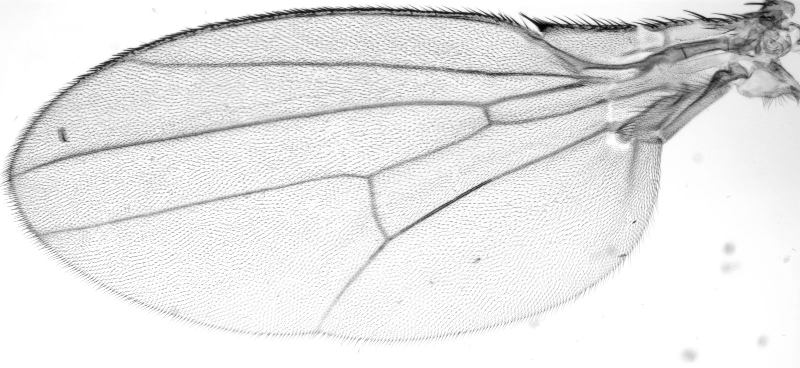

In [2]:
import net.imglib2.type.numeric.real.FloatType
import io.scif.img.ImgOpener

// open sample image with ImgOpener as FloatType
img = new ImgOpener().openImgs("http://samples.fiji.sc/tutorials/DrosophilaWing.tif", new FloatType()).get(0)

First we need to use linear interpolation to convert the input into a RealRandomAccessible.

In [3]:
import net.imglib2.type.numeric.real.FloatType
import net.imglib2.view.Views
import net.imglib2.interpolation.randomaccess.NLinearInterpolatorFactory

// use linear interpolation to convert the input into a RealRandomAccessible
realRandomAccessible = Views.interpolate(Views.extendMirrorSingle(img), new NLinearInterpolatorFactory<FloatType>())

net​.imglib2​.interpolation​.Interpolant​@73cfa7cc

 Then it shows the rendering using nearest neighbor interpolation.

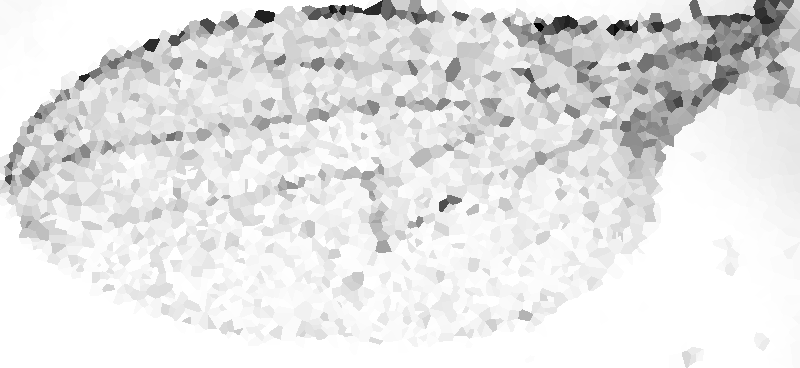

In [4]:
// You can change this variable to other number
numPoints = 4096
randomNNSample = obj.randomSampling(realRandomAccessible, img, numPoints)

At last it shows the result when use a distance weighted interpolation of the numPoints nearest neighbors.

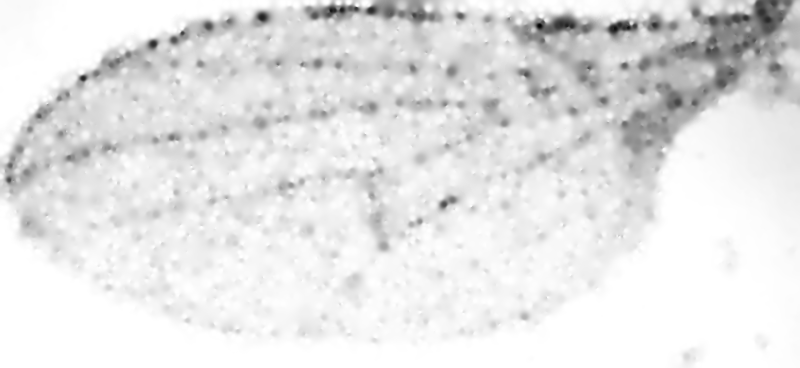

In [5]:
randomKNNSample = obj.randomSamplingKNearest(realRandomAccessible, img, numPoints)

You should notice the display and running time difference between nearest neighbor interpolation and distance weighted interpolation of k nearest neighbors.